# Data Science 2 : suite rappel d’algèbre linéaire (matrices) et illustration avec la réduction de dimension

Enseignant : Jean Delpech

Cours : Data Science

Classe : M1 Data/IA

Année scolaire : 2025/2026

Dernière mise à jour : novembre 2025

Dans le chapitre précédent nous avons vu les notions élémentaires de l’algèbre linéaire : tout d’abord une présentation historique pour bien prendre conscience de la raison d’être de cette discipline, quels problèmes elle propose de résoudre et quelle perspective elle propose d’adopter, pour ensuite découvrir les notions de vecteurs, de scalaire, d’espace vectoriel, de norme, de barycentre, de variance et d’inertie. Ces outils nous ont permis d’élaborer un algorithm de clustering : k-means.

Dans ce second chapitre nous découvrirons les notions de matrices, leurs types, les différentes opérations matricielles, les transformations linéaires, les projections et changement de base, les matrices de covariances, les valeurs propres, etc. 

Ces notions nous permettrons de nous attaquer à un problème essentiel pour le data scientist : la réduction de dimension. En effet il n’est pas rare en data science de devoir gérer des données avec de très nombreuses features, illisibles pour un humain et inefficace à exploiter dans leur totalité. On va donc chercher à « regrouper » ensemble les observations (clustering) selon certains critères, mais aussi les features, afin de ne retenir que les dimensions qui apportent de l’information par rapport au problème posé. C’est une technique que l’on va mettre en œuvre dans tous les domaines de la science des données (analyse, machine learning, deep learning). 

Après avoir vu les notions d’algèbre linéaire adéquates, nous implémenterons une technique de réduction de dimension : l’analyse en composante principale.

Vous apprendrez (ou réviserez) :
- la définition des matrices et les différents types de matrices
- la définition des opérations sur les matrices
- comment les matrices permettent de réaliser des transformatiosn linéaires (application géométrique : rotation, symétrie, etc.)
- la notion de base et de changement de base, de projection
- la matrice de variance/covariance
- les vecteurs et les valeurs propres
- l’algorithme ACP (ou PCA) pour réduire les dimensions
- les limites de cet algorithme

## Matrices et opérations matricielles

### Définition et notation

L’approche la plus directe (pour ne pas dire « naïve ») de ce qu’est une **matrice** est de la définir comme un tableau rectangulaire de nombres organisés en lignes et colonnes. Par exemple :

$$
M = \begin{bmatrix} 
    2.256 & 3.56 & 7.65 \\ 
    4.0 & 25.45 & 0.658 
\end{bmatrix}
$$

Nous avons là une matrice M de nombres rééls à 2 lignes et 3 colonne, ou « matrice 2×3 »

Une matrice $A$ de dimension $m \times n$ (m lignes, n colonnes) s'écrit :

$$A \in \mathbb{R}^{m \times n}$$

Les éléments sont notés $A[i,j]$ ou $a_{ij}$ (élément à la ligne i, colonne j).

Ainsi dans notre exemple, l’élément M[2,3] est le nombre 0,658.

Par convention on va toujours faire référence à la ligne en premier, puis la colonne. Je ne le répéterai jamais assez :

ligne, puis colonne
ligne, puis colonne
ligne, colonne…

Mémorisez bien cette convention elle permettra de ne pas vous perdre quand on définira certaines opérations avec des matrices (comme la multiplication), car l’ordre dans lequel on va parcourir la matrice aura une importance cruciale.

#### Lien avec les données

En data science, un dataset est naturellement représenté par une matrice :
- **Lignes** : enregistrement/observations/échantillons/individus
- **Colonnes** : variables/features/caractéristiques

**Exemple** : Dataset de clients :

In [2]:
import numpy as np

# Dataset comme matrice
# Lignes = clients, Colonnes = [âge, revenu, nb_achats]
X = np.array([
    [25, 50000, 3],  # client 1
    [34, 65000, 5],  # client 2
    [28, 48000, 2],  # client 3
    [45, 80000, 8],  # client 4
    [23, 42000, 1],  # client 5
])

print("Matrice de données X :")
print(X)
print("\nLignes = clients, Colonnes = [âge, revenu, nb_achats]")
print(f"Dimension : {X.shape[0]} clients × {X.shape[1]} features")
print(f"X ∈ ℝ^{X.shape[0]}×{X.shape[1]}")

Matrice de données X :
[[   25 50000     3]
 [   34 65000     5]
 [   28 48000     2]
 [   45 80000     8]
 [   23 42000     1]]

Lignes = clients, Colonnes = [âge, revenu, nb_achats]
Dimension : 5 clients × 3 features
X ∈ ℝ^5×3


Nous allons voir dans la suite de ce cours que les matrices sont des outils bien plus sophistiquées que cela, qui peuvent modéliser un bon nombre de problèmes mathématiques et avoir bien des applications. Nous verrons notamment la place qu’elles occupent en algèbre linéaire.

#### Taxonomie des matrices

Les matrices peuvent présenter une grande variété de motifs (*patterns*), ces formes vont refléter les propriétés mathématiques des objets, opérations ou autres problèmes qu’elles modélisent. Passons donc ces formes en revue !

#### Matrice ligne (vecteur ligne)

Une matrice peut très bien n’avoir qu’une seule ligne, dans ce cas le nombre d’éléments de la matrice sera égal au nombre de colonnes. On parlera aussi de vecteur ligne, par exemple pour représenter un enregistrement de *n* features dans un dataset.

$$
M = \begin{bmatrix} 34.256 & 2.88 & 6.0 & -34.5761 & 2.546 & -79.8 \end{bmatrix}
$$

Dimension $1 \times n$ : une seule ligne

En fait on peut voir une matrice *n* × *m* comme l’empilement de *n* vecteurs lignes de dimension *m*

#### Matrice colonne (vecteur colonne)

De la même manière que précédemment, une matrice peut se limiter à une seule colonne. On parlera aussi de vecteur colonne, par exemple pour représenter toutes les valeurs d’une features pour chaque enregistrement (p. ex. : `pandas.Series.`)

$$
M = \begin{bmatrix} 34.256 \\ 
                    2.88 \\
                    6.0 \\
                    -34.5761 \\
                    2.546 \\
                    79.8 
\end{bmatrix}
$$

Dimension $n \times 1$ : une seule colonne

Dans ce cas on pourrait voir une matrice *n* × *m* comme une succession de *m* vecteurs colonnes de dimension *n*.

La disposition en ligne ou en colonne n’est pas qu’une simple fantaisie esthétique, nous verrons plus loin qu’elle peut avoir de graves conséquences lorsque l’on commencera à réaliser des opérations avec ces matrices, dont le résultat dépendra grandement de la manière dont sont disposés les éléments dans une matrice. 

#### Matrice nulle

C’est une matrice dont tous les éléments sont nuls :

$$
0_{2, 3} = \begin{bmatrix} 0 & 0 & 0 \\
                            0 & 0 & 0
\end{bmatrix}
$$

ou encore :

$$
0_{2, 2} = \begin{bmatrix} 0 & 0 \\
                            0 & 0
\end{bmatrix}
$$

Notez la notation qui fait référence à ses dimensions.

La matrice nulle est un élément neutre (ou élément identité – à ne pas confondre avec la *matrice* identité que nous verrons ci-dessous) pour certaines opérations sur les matrices. 

#### Matrice carrée

La plupart des matrices sont rectangulaires (le nombre de lignes et de colonnes sont différents). Mais lorsque le nombre de lignes et de colonnes est identique, on parlera de matrice carré.

$$
M = \begin{bmatrix} 34.256 & 2.88 & 6.0 \\
                    -34.5761 & 2.546 & 79.8 \\
                    10.342 & -0.257 & -3.82
\end{bmatrix}
$$


Dimension $n \times n$ : même nombre de lignes et de colonnes

Ces matrices possèdent des propriétés particulières (certaines opérations leurs seront spécifiques)

#### Matrice identité $I_n$
La matrice identité est une matrice carrée très particulière, avec des 1 sur la diagonale et des 0 ailleurs

$$I_3 = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$$

Notez la notation qui fait référence à ses dimensions.

Comme son nom le suggère, elle va jouer le rôle d’élément identité (ou élément neutre) pour certaines opérations sur les matrices.

#### Matrice diagonale
Matrice carrée avec des valeurs non nulles uniquement sur la diagonale (seuls les éléments dont les indices ligne et colonnes sont identiques sont non nuls) :

$$
M= \begin{bmatrix} a_{1,1} & 0 & 0 \\
                    0 & a_{2,2} & 0 \\
                    0 & 0 & a_{3,3}
\end{bmatrix}
$$

Ce motif est l’un des plus simples que l’on puisse rencontrer, et il a plusiers propriétés intéressantes :
* c’est une matrice qui contient un grand nombre de zéro, et on sait exactement où ils sont. En informatique, il est inutile de représenter ces matrices dans leur totalité en mémoire (on peut juste retenir les éléments de la diagonale), ce qui fait gagner beaucoup de ressource. Ce principe se retrouve dans les *sparse matrixes*
* Certaines opérations, comme l’inversion, sont très simples : il suffit d’inverser tous les éléments de la diagonale.
$$
M^{-1}= \begin{bmatrix} 1/a_{1,1} & 0 & 0 \\
                    0 & 1/a_{2,2} & 0 \\
                    0 & 0 & 1/a_{3,3}
\end{bmatrix}
$$
  C’est beaucoup, beaucoup, beaucoup plus compliqué d’inverser une matrice quelconque.

#### Matrice triangulaire

Ce sont des matrices où toutes les valeurs au dessus (diagonale supérieure) ou en dessous (diagonale inférieure) de la diagonale sont nulles.

$$
M= \begin{bmatrix} a_{1,1} & a_{1,2} & a_{1,3} \\
                    0 & a_{2,2} & a_{2,1} \\
                    0 & 0 & a_{3,3}
\end{bmatrix}
$$

ou 

$$
M= \begin{bmatrix} a_{1,1} & 0 & 0 \\
                    a_{2,1} & a_{2,2} & 0 \\
                    a_{3,1} & a_{3,2} & a_{3,3}
\end{bmatrix}
$$

Ce sont des matrices très intéressantes pour modéliser des problèmes comme les systèmes linéaires car elles permettent d’organiser efficacement les calculs (le premier coefficient unique sur une ligne permet de trouver la première valeur, et ainsi de suite). 

#### Exercice 1 : créer des matrices avec numpy

Utilisez numpy pour créer différents types de matrices. Pour remplir, contentez vous d’utiliser des nombres entier (1, 2, 3…). N’hésitez pas à utiliser des méthodes qui permettent de générer certains types de matrices particuliers (explorez la doc de numpy si besoin)

In [1]:
#Exercice 1 : votre code

import numpy as np

# Vecteur ligne (1 × 3)


# Vecteur colonne (3 × 1)


# Matrice identité


# Matrice diagonale


## Opérations matricielles

On peut réaliser différentes opérations sur les matrices, certaines triviales, comme l’addition, d’autres qui demandent d’être définie de manière plus réfléchies, comme la multiplication, et encore d’autres opérations qui leur sont spécifiques, comme la transposée.

Afin d’illustrer la manière dont sont réalisées les opérations, considérons différents types d’exemples de matrices, qui codent un problème concret. Imaginons trois tables (matrices) :

1. Une table où chaque ligne est affectée à un client, et chaque colonne à un produit commandé : chaque cellule de la table indique le nombre de produits commandés par un client donné :

|Commandes| A | B | C |
|---------|---|---|---|
|Client 1 | 4 | 10| 2 |
|Client 2 | 8 | 1 | 5 |
|Client 3 | 3 | 2 | 0 |
|Client 4 | 5 | 3 | 1 |

Ainsi selon cette table le client 2 a commandé 5 fois le produit C.

Cette table peut-être modélisée par la matrice suivante :
$$
M_{commandes}(3, 3) = \begin{bmatrix} 4 & 10 & 2 \\
                    8 & 1 & 5 \\
                    3 & 2 & 0 \\
                    5 & 3 & 1
\end{bmatrix}
$$

2. Une table des prix pour chaque produit :

|Prix | (€) |
|-----|-----|
| A   |  5  |
| B   |  1.5|
| C   | 10  |

Cette table peut être modélisée par un vecteur/matrice colonne :

$$
M_{prix}(3, 1) = \begin{bmatrix} 5 \\
                    1.5 \\
                    10
\end{bmatrix}
$$

Enfin considérons une table qui indique la quantité de matière première et le temps de travail nécessaire à la production de chaque produit :

| Ressources| Kilo | Heures|
|-----------|------|-------|
| A         | 1.5  | 1     |
| B         | 2    | 5     |
| C         |0.5   | 0.5   |

Cette fois-ci on utilisera une matrice rectangulaire (3, 2) pour la modélisation :

$$
M_{ressources}(3, 2) = \begin{bmatrix} 1.5 & 1 \\
                    2 & 5 \\
                    0.5 & 0.5
\end{bmatrix}
$$

### Addition 

Imaginons qu’après un mois d’activité, un commercial souhaite mettre à jour le nombre de produits vendus à ses clients. Imaginons les ventes du jour :

|Vente du jour | A | B | C |
|--------------|---|---|---|
|Client 1      | 1 | 2 | 1 |
|Client 2      | 3 | 0 | 4 |
|Client 3      | 0 | 1 | 0 |
|Client 4      | 2 | 1 | 3 |

et la matrice correspondante :

$$
M_{jour}(4, 3) = \begin{bmatrix} 1 & 2 & 1 \\
                    3 & 0 & 4 \\
                    0 & 1 & 0 \\
                    2 & 1 & 3
\end{bmatrix}
$$

Si on veut mettre à jour les ventes réalisées, on voit que de manière tout à fait naturelle il suffit d’ajouter les deux matrices cellule par cellule :

$$
M_{total}(4, 3) = M_{commandes}(4, 3) +
M_{jour}(4, 3) = \\
\begin{bmatrix} 4 & 10 & 2 \\
                    8 & 1 & 5 \\
                    3 & 2 & 0 \\
                    5 & 3 & 1
\end{bmatrix}  + \begin{bmatrix} 1 & 2 & 1 \\
                    3 & 0 & 4 \\
                    0 & 1 & 0 \\
                    2 & 1 & 3
\end{bmatrix} = \\
\begin{bmatrix} 4+1 & 10+2 & 2+1 \\
                    8+3 & 1+0 & 5+4 \\
                    3+0 & 2+2 & 0+0 \\
                    5+2 & 3+1 & 1+3
\end{bmatrix} = \\
\begin{bmatrix} 5 & 12 & 3 \\
                11 & 1 & 9 \\
                3 & 4 & 0 \\
                7 & 4 & 4
\end{bmatrix}
$$

Ainsi, pour définir **l’addition** : deux matrices de **même dimension** peuvent être additionnées élément par élément.
  
$$C = A + B \quad \Rightarrow \quad c_{ij} = a_{ij} + b_{ij}$$

Il vient immédiatement que les matrices nulles sont bien un élément neutre pour l’addition, pour des dimensions données.

Nous avons vu dans le chapitre précédent, que ce qui caractérisait un espace vectoriel était que l’additon de deux vecteurs donnait également un vecteur. On voit ici que deux matrices qu’on additionne donne une matrice (à condition que les matrices aient des dimensions identiques).

*Lorsque l’on réalise des opérations entre matrices, les dimensions des matrices va avoir une importance capitale : certaines dimensions doivent absolument être compatible pour que l’opération puisse être réalisée*

### Multiplication scalaire

Imaginons que pour une raison quelconque, les commandes de tous les clients doublent. On modèliserait cette évolution dans les commandes en multipliants toutes les commandes par deux :

$$
2 · M_{commandes} = 2 · \begin{bmatrix} 4 & 10 & 2 \\
                    8 & 1 & 5 \\
                    3 & 2 & 0 \\
                    5 & 3 & 1
\end{bmatrix} = \\
\begin{bmatrix} 2·4 & 2·10 & 2·2 \\
                    2·8 & 2·1 & 2·5 \\
                    2·3 & 2·2 & 2·0 \\
                    2·5 & 2·3 & 2·1
\end{bmatrix} = \\
\begin{bmatrix} 8 & 20 & 4 \\
                16 & 2 & 10 \\
                6 & 2 & 0 \\
                10 & 6 & 2
\end{bmatrix}
$$

Ou, dans une hypothèse plus réaliste de multiplication des prix (inflation…), qu’il en serait de même pour la matrice des prix, d’une autre dimension :

$$
2 · M_{prix}(3, 1) = \\
2 · \begin{bmatrix} 5 \\
                    1.5 \\
                    10
\end{bmatrix} = \\
\begin{bmatrix} 10 \\
                3 \\
                20
\end{bmatrix}
$$

Dans notre exemple, nous avons multiplié une matrice par un nombre unique : nous reconnaissons là un *scalaire*.
On peut donc définir ainsi la **multiplication scalaire** : multiplier chaque élément par le scalaire

$$C = \alpha A \quad \Rightarrow \quad c_{ij} = \alpha \cdot a_{ij}$$

Ici aussi on peut faire le rapprochement avec ce que nous avons vu pour les vecteurs et la multiplication par un scalaire. En fait nous constatons qu’un ensemble de matrices de dimensions données (m, n) forment un espace vectoriel.

#### Exercice 2 : addition et multiplication scalaire

Soit les matrices :
$$A = \begin{bmatrix} 2 & -1 \\ 0 & 3 \end{bmatrix}, \quad B = \begin{bmatrix} 1 & 4 \\ 2 & -1 \end{bmatrix}$$

Calculez :
- a) $A + B$
- b) $3A$
- c) $2A - B$

In [2]:
# Exercice 2 : votre code !

A = np.array([[2, -1], 
              [0, 3]])
B = np.array([[1, 4], 
              [2, -1]])

print("A =")
print(A)
print("\nB =")
print(B)

# a) A + B


# b) 3·A

# c) 2A - B


A =
[[ 2 -1]
 [ 0  3]]

B =
[[ 1  4]
 [ 2 -1]]


### Transposée

Voici une opération spécifique à l’univers des matrices qu’il est bon de connaître avant de s’attaquer à des opérations plus complexes : la transposition. On obtient la transposée d’une matrice quelconque par symétrie par rapport à la diagonale principale. Plus simplement, il s’agit d’échanger lignes et colonnes d’une matrice :
$$
\text{Soit }M_{commandes} = \begin{bmatrix} 4 & 10 & 2 \\
                    8 & 1 & 5 \\
                    3 & 2 & 0
\end{bmatrix}\\
M_{commandes}^{T} = \begin{bmatrix} 4 & 8 & 3 \\
                    10 & 1 & 2 \\
                    2 & 5 & 0
\end{bmatrix}\\
\text{Et bien sûr il vient immédiatement que la transposée d’une matrice transposée est la matrice d’origine :}\\
(M_{commandes}^{T})^{T} = \begin{bmatrix}  4 & 10 & 2 \\
                    8 & 1 & 5 \\
                    3 & 2 & 0
\end{bmatrix}
$$

Exemple avec une matrice rectangulaire :

$$
M_{ressources} = \begin{bmatrix} 1.5 & 1 \\
                    2 & 5 \\
                    0.5 & 0.5
\end{bmatrix}\\
M_{ressources}^{T} = \begin{bmatrix} 1.5 & 2 & 0.5 \\
                    1 & 5 & 0.5
\end{bmatrix}
$$

$$A^T[i,j] = A[j,i]$$

Si $A$ est de dimension $m \times n$, alors $A^T$ est de dimension $n \times m$.

* La transposition est linéaire (α scalaire) :
    * $(A+B)^{\mathsf {T}}=A^{\mathsf {T}}+B^{\mathsf {T}}$
    * $(\alpha A)^{\mathsf {T}}=\alpha A^{\mathsf {T}}$
* La transposition est distributive par rapport au produit, « en ordre inverse » : $(AB)^{\mathsf {T}}=B^{\mathsf {T}}\,A^{\mathsf {T}}$

### Produit matriciel

Comment définir le produit (multiplication) entre deux matrices ?

Naïvement on pourrait se dire qu’il suffit ici aussi de multiplier élément par élément, comme pour l’addition :

$$C = A · B \quad \Rightarrow \quad c_{ij} = a_{ij} · b_{ij}$$

Par exemple :

$$C(2,2) = A(2,2) · B(2,2) = \\
\begin{bmatrix} a_{1,1} & a_{1,2}\\
                a_{2,1} & a_{2,2}
\end{bmatrix} ·
\begin{bmatrix} b_{1,1} & b_{1,2}\\
                b_{2,1} & b_{2,2}
\end{bmatrix}= \\
\begin{bmatrix} a_{1,1} · b_{1,1}& a_{1,2} · b_{1,2} \\
                a_{2,1} · b_{2,1}& a_{2,2} · b_{2,2}
\end{bmatrix}
$$

On appelle cette manière de définir la multiplication entre matrices **produit de [Hadamard](https://fr.wikipedia.org/wiki/Jacques_Hadamard)**. Cette opération est utilisée dans certains modèles de machine learning, et notamment en deep learning (réseaux de neurones artificiels). Les travaux de Hadamard sont três utilisés dans le domaine du traitement du signal, de la compression de données ou de la cryptographie.

Cette définition permet de disposer d’une multiplication qui a de nombreuses propriétés intéressantes, qui sont celles de la multiplication usuelle entre nombres : associativité, distributivité, commutativité… au prix d’une limite : elle n’est possible qu’entre matrices de mêmes dimensions (comme l’addition, vue précédemment, dont le processus est analogue).

Néanmoins, on définit le produit matriciel usuel un peu différemment.

Revenons à notre exemple. Imaginons que notre commercial, disposant de la matrice des commandes et de la matrices des prix, veuille créer un table qui récapitule ce que chaque client a payé pour l’ensemble de ses commandes. On voudrait obtenir ce résultat en multipliant simplement la matrice des commandes par la matrices des prix, de la même manière qu’on multiplierai le nombre total de commande d’un produit pour connaître le prix du total commandé. Voyons comment il faudrait définir la multiplication pour obtenir ce résultat.

En tout premier lieu, on constate que les dimensions de la matrice commandes et de la matrice des prix sont différentes, le produit de Hadamard est d’ores et déjà impossible à exploiter.
Pour s’en sortir,on va définir le produit matriciel de manière un peu différente, mais un peu plus complexe.

Revenons à nos tables : 
|Commandes| A | B | C |
|---------|---|---|---|
|Client 1 | 4 | 10| 2 |
|Client 2 | 8 | 1 | 5 |
|Client 3 | 3 | 2 | 0 |
|Client 4 | 5 | 3 | 1 |

|Prix | (€) |
|-----|-----|
| A   |  5  |
| B   |  1.5|
| C   | 10  |

Ce qu’on voudrait, c’est trouver une définition de la multiplication entre matrices qui permettent d’obtenir la table suivante :

|Client   | Prix payé pour A, B et C  |
|---------|-------------------------- |
|Client 1 | 4 · 5 + 10 · 1.5 + 2 · 10 = 55|
|Client 2 | 8 · 5 +  1 · 1.5 + 5 · 10 = 91.5|
|Client 3 | 3 · 5 +  2 · 1.5 + 0 · 10 = 18 |
|Client 4 | 5 · 5 +  3 · 1.5 + 1 · 10 = 39.5

Soit, en généralisant sous forme matricielle :

$$M_{facture}(3,3) = M_{commandes}(3,3) × M_{prix}(3,1) = \\
\begin{bmatrix} a_{1,1} & a_{1,2} & a_{1,3}\\
                a_{2,1} & a_{2,2} & a_{2,3}\\
                a_{3,1} & a_{3,2} & a_{3,3}\\
\end{bmatrix} ×
\begin{bmatrix} b_{1,1}\\
                b_{2,1}\\
                b_{3,1}
\end{bmatrix}= \\
\begin{bmatrix} a_{1,1} · b_{1,1} + a_{1,2} · b_{2,1} + a_{1,3} · b_{3,1}\\
                a_{2,1} · b_{1,1} + a_{2,2} · b_{2,1} + a_{2,3} · b_{3,1}\\
                a_{3,1} · b_{1,1} + a_{3,2} · b_{2,1} + a_{3,3} · b_{3,1}
\end{bmatrix}
$$

L’opération décrite ici se fait **ligne à colonne** : si on cherche à calculer $A×B = C$, on parcourt chaque ligne de la matrice $A$ et simultanément chaque colonne de la matrice $B$, et on multiplie chaque élément de chaque ligne de $A$ par chaque élément de chaque colonne de $B$, et ont somme avec les autres produits sur la même ligne. Il vient immédiatement que pour effectuer cette opération, *il faut dans notre exemple que le nombre de colonnes de la matrice $A$ soit égal au nombre de lignes de la matrice $B$*. De plus, la matrice résultante a autant de lignes que la matrice $A$, et autant de colonnes que la matrice $B$.

Par ailleurs, on voit aussi rapidement que **cette opération n’est pas commutative** (écrivez explicitement le calcul de $BA$ si cela ne vous saute pas aux yeux). En fait ce n’est même pas que $AB \neq BA$ mais que bien souvent $BA$ est carrément *impossible* (le nombre de colonnes de $B$ n’est pas égal au nombre de lignes de $A$). 

Dans notre exemple, la matrice $B$ était un vecteur colonne, mais ce peut très bien être une matrice de dimensions différentes, *la seule chose qui importe est que le nombre de colonnes de la matrice $A$ et de lignes de la matrice $B$ correspondent*.

Par exemple si on considère la matrice *ressources*, on pourrait très bien calculer combien de ressources (en matière première, et en temps) chaque commande de chaque client a coûté :

|Commandes| A | B | C |
|---------|---|---|---|
|Client 1 | 4 | 10| 2 |
|Client 2 | 8 | 1 | 5 |
|Client 3 | 3 | 2 | 0 |
|Client 4 | 5 | 3 | 1 |

| Ressources| Kilo | Heures|
|-----------|------|-------|
| A         | 1.5  | 1     |
| B         | 2    | 5     |
| C         |0.5   | 0.5   |

D’où :

|Client   | Kilo                       | Heures                   |
|---------|----------------------------|--------------------------|
|Client 1 | 4 · 1.5 + 10 · 2 + 2 · 0.5 | 4 · 1 + 10 · 5 + 2 · 0.5 |
|Client 2 | 8 · 1.5 + 1 · 2 + 5 · 0.5  | 8 · 1 + 1 · 5 + 5 · 0.5  |
|Client 3 | 3 · 1.5 + 2 · 2 + 0 · 0.5  |  3 · 1 + 2 · 5 + 0 · 0.5 |
|Client 3 | 5 · 1.5 + 3 · 2 + 1 · 0.5  |  5 · 1 + 3 · 5 + 1 · 0.5 |

Une manière d’interpréter cette opération ici est qu’elle permet d’exprimer les features de la matrice B en fonction des observations de la matrice A.

On peut généraliser cette définition de la multiplication entre matrices avec cette formule :

$$
\text{Soit deux matrices } A(m,n)=(a_{i,j}) \text{ et } B(n,k)= (b_{i,j}) \text{ alors leur produit } A·B=C(m,p)=(c_{i,j}) \text{ est défini ainsi :}\\
\forall i,j:c_{ij}=\sum _{k=1}^{n}a_{ik}b_{kj}=a_{i1}b_{1j}+a_{i2}b_{2j}+\cdots +a_{in}b_{nj}
$$

Le produit matriciel est une opération tellement importante en calcul numérique que la recherche d’algorithmes efficaces pour optimiser ce calcul est encore à l’ordre du jour. Nous verrons plus bas pourquoi il est particulièrement intéressant de pouvoir enchaîner des multiplications de matrices.

Enfin il n’aura pas échappé aux plus observateur-ice-s, que cette définition du produit matriciel ressemble fortement à celle du produit sclaire vu pour les vecteurs de dimension n (somme de produits). Effectivement, on peut considérer le produit matriciel comme une généralisation du produit scalaire, le produit matriciel entre un vecteur colonne et un vecteur ligne donnant une matrice (1, 1) à un seul coefficient, c’est à dire un scalaire :
$$
\langle u, v \rangle = u^{T} · v
$$

Mais attention, si le produit scalaire jouit de certaines propriétés car il est justement un cas particulier, ces propriétés ne sont pas généralisables au produit matriciel. Voici les différences entre produit scalaire et produit matriciel :

* le produit scalaire est réalisé entre deux vecteurs et donne un scalaire, le produit matriciel est réalisé entre deux matrices et donne une matrice
* le produit scalaire est commutatif ($ \langle u, v \rangle = \langle v, u \rangle  $, le produit matriciel ne l’est pas $A·B \neq B·A$
* le produit scalaire exige que les deux vecteurs aient la même dimension, le produit matriciel peut être réalisé entre des matrices de dimensions différentes, à condition que le nombre de colonnes de la première soit égal au nombre de lignes de la seconde

Cette distinction se retrouve aussi dans la syntaxe de Python/Numpy.

Le produit scalaire est appelé *dot product* en anglais, mais c’est un nom qui est un peu ambigu, car il met l’accent sur l’usage de l’opération $·$ (produit). On va l’utiliser pour toutes les opérations qui réalisent « la somme des produits composante par composante », c’est-à-dire $u · v = u_1·v_1 + u_2 · v_2 + … + u_n·v_n$. Par ailleurs le terme *inner produt* désigne plus généralement ce que nous appelons strictement en français produit scalaire (toute opération entre deux vecteurs dont le résultat est un scalaire − on peut créer d’autres définitions du produit scalaire que celle que nous avons vu), on trouve aussi l’appelation *scalar product.* 

Ainsi, la méthode `numpy.dot()` permet de faire le produit de deux `arrays`, quelle que soit leur dimension, et elle implémentera des opérations mathématiquement différentes en fonction de la dimension des `arrays` : 
* s’il s’agit de deux arrays de dimension 0 (des scalaires en fait), ce sera le produit classique
* s’il s’agit de deux arrays de dimension 1, ce sera un produit scalaire tel que nous le connaissaons
* s’il s’agit d’arrays de dimension 2 (donc des matrices), ce sera un produit matriciel
* s’il s’agit de tenseurs (vous verrez cela en deep learning) il réalisera la somme des produits sur les derniers axes de chaque tenseur

Le choix de ce nom est historique : d’autre bibliothèque de calcul en algèbre linéaire (comme BLAS) utilisent cette appellation pour la même opération. De plus ce mot décrit bien les opérations effectuées dans plusieurs dimensions, il est concis et n’est pas aussi ambigu que le mot «scalar product» (on multiplie par un scalaire ou est-ce que le résultat de la multiplication est un scalaire ?). Enfin du moment que les arguments sont des arrays, il marche tout le temps, mais le résultat peut-être assez différent, car ce n’est pas la même opération mathématique qui est implémentée à chaque fois.

* C’est pour cela **qu’on conseille fortement d’utiliser l’opérateur `@`** lorsque l’on réalise le produit matriciel (ou la méthode `numpy.matmul()`) sur des `2D-arrays` (matrices), par soucis de lisibilité.
* Pour les `0D-arrays`, on recommande d’utiliser `numpy.multiply()` ou `*`, pour les mêmes raisons.
* **Et attention**, entre deux matrices l’opérateur `*` réalise simplement le produit composant par composant (produit d’Hadamard), c’est une faute d’inattention courante chez les étudiant-e-s en machine learning !!


#### Exercice 3 : Produit matriciel



In [4]:
# Exercice 3 : votre code !

# Produit matriciel

A = np.array([[1, 2],
              [3, 4]])
B = np.array([[5, 6],
              [7, 8]])
v = np.array([2, 1])

print("A =")
print(A)
print("\nB =")
print(B)
print(f"\nv = {v}")

# Produit AB


# Produit BA


# Vérifier que AB ≠ BA


# Produit matrice-vecteur Av


# A²


# Vérifier (A²)^T = (A^T)²


### Matrice inverse

#### Position du problème

Qui dit multiplication, dit division. Diviser revient à multiplier par l’inverse : on cherche à réaliser une opération « qui va dans l’autre sens » (comme la soustraction avec l’addition). Voyons donc comment on peut définir une telle opération lorsque l’on manipule des matrices.

Voilà comment se pose le problème : connaissant les matrices $M_{commandes}$ et $M_{factures}$, saurait-on remonter de la facture aux prix ? 
$$
\text{Soit } M_{commandes} × M_{prix} = M_{factures}
$$ 
$M_{prix}$ est ici l’inconnue, alors si on note $M^{-1}_{commandes}$ l’inverse de $M_{commandes}$, $M_{prix}$ peut être calculée ainsi :

$$
M_{prix} = M^{-1}_{commandes} × M_{factures}
$$

L’idée serait de calculer la matrice inverse d’une matrice $M_{commandes}$ pour retrouver, en la multipliant par la matrice $M_{factures}$, la matrice $M_{prix}$. Mais comment faire ? Est-ce qu’un telle matrice existe ? (la première étape d’un problème en mathématique est souvent déjà de se demander si la solution existe).

Revenons à notre équation de départ :

$$
\text{Soit } M_{commandes} × M_{prix} = M_{factures}
$$ 

Si $M_{prix}$ est inconnu, écrivons :

$$
\begin{bmatrix} 4 & 10 & 2 \\
                    8 & 1 & 5 \\
                    3 & 2 & 0 \\
                    5 & 3 & 1
\end{bmatrix} ×
\begin{bmatrix} p_{1}\\
                p_{2}\\
                p_{3}
\end{bmatrix}= 
\begin{bmatrix} 55\\
                91.5\\
                18\\
                39.5
\end{bmatrix}\\
\text{ce qui correspondont au système linéaire suivant : }
\begin{cases}
4p_1 + 10p_2 + 20p_3 = 55 \\
8p_1 + 1p_2 + 5p_3 = 91.5 \\
3p_1 + 2p_2 + 0p_3 = 18 \\
5p_1 + 3p_2 + 1p_3 = 39.5
\end{cases}
$$

Résoudre ce système, c’est trouver une solution au problème et donc prouver que la matrice $M^{-1}_{commandes}$ existe (mais il nous faudra encore la déterminer). Mais déjà, en posant le problème ainsi, on voit déjà apparaître des difficultés : nous avons 3 variables inconnues, et un système à 4 équations. On dit que le problème est **surdéterminé** : il y a trop de contraintes, ce qui signifie qu’il y a très peu de chances que le système ait une solution (c’est possible si une équation du système est linéairement dépendante d’une autre, et donc expriment la même contrainte). De même, s’il y a moins d’équation que de variables (par exemple si la matrice M_{commandes} n’avait qu’une ou deu lignes, on n’aurait pas assez de contrainte donc les solutions ne seraient pas uniques. 

C’est pour cela qu’on va considérer qu’une matrice est inversible seulement si on est sûr d’avoir une solution unique, c’est à dire qu’on a une matrice carrée dont les lignes sont linéairement indépendantes (car ainsi on aurait 3 équations et 3 inconnues).

#### Rang d’une matrice

Le rang indique le nombre de directions (lignes ou colonnes) indépendantes présentes dans la matrice : c‘est le nombre maximal de lignes (ou colonnes) linéairement indépendantes. 

Le rang demande des calculs un peu rébarbatifs, par exemple mettre la matrice sous forme échelonnée (via [la méthode de Gauss-Jordan](https://fr.wikipedia.org/wiki/%C3%89limination_de_Gauss-Jordan)), le nombre de lignes non nulles dans cette forme échelonnée est alors le rang. On ne détaille pas les calculs mais la forme échelonnée de $M_{commandes}$ est :
$$
\begin{bmatrix}
1 & \tfrac{5}{2} & 5 \\
0 & 1 & \tfrac{35}{19} \\
0 & 0 & 1 \\
0 & 0 & -\tfrac{13}{2}
\end{bmatrix}
$$

Avec 3 colonnes et 4 lignes (les équations sont donc bien toutes indépendantes), la matrice est de rang 3.

Pour qu’une matrice carrée soit inversible, il faut qu’elle soit de **rang maximal** : si une matrice $A$ est de dimension $(n, n)$ alors il faut que $Rang(A) = n$

#### Déterminant

Pour une matrice carrée de petite dimension, il existe une méthode beaucoup plus simple pour déterminer si une telle matrice est de rang maximal (donc inversible) : calculer son déterminant. Si le déterminant est nul, alors elle n’est pas de rang maximal (et si le déterminant est nul, alors elle l’est).

Qu’est-ce que le déterminant d’une matrice, et comment le calculer ?

Le déterminant d'une matrice 2×2 est donné par :

$$
\det \begin{bmatrix}⁡a & b\\
                    c & d
\end{bmatrix}= ad−bc
$$
Pour une matrice 3×3, on utilise par exemple la règle de [Sarrus](https://fr.wikipedia.org/wiki/Pierre-Fr%C3%A9d%C3%A9ric_Sarrus) (pour un calcul à la main). Il s’agit de :
* écrire les trois colonnes de la matrice
* rajouter en dessous les deux première lignes de la matrice
* faire les produit des coefficients des diagonales et d’en faire la somme pour les diagonales descendantes vers le bas/droite, et la différence pour celles ascendantes vers haut/droite

Ce qui nous donne : 
$$
\det \begin{bmatrix}⁡a & b & c\\
                    d & e & f\\
                    g & h & i
\end{bmatrix}= aei+bfg+cdh−ceg−bdi−afh\\
\text{ en gardant en tête, pour la méthode de Sarrus : }
\begin{bmatrix}⁡a & b & c\\
                    d & e & f\\
                    g & h & i\\
                    a & b & c\\
                    d & e & f
\end{bmatrix}
$$

La formule du déterminant est complexe à écrire (elle fait appel à des permuatations) :
$$
\det(A)=\begin{vmatrix} a_{1;1} & \cdots & a_{1;n} \\ \vdots & \ddots & \vdots \\ a_{n;1} & \cdots & a_{n;n} \end{vmatrix} = \sum_{\sigma \in \mathfrak{S}_n}
\varepsilon(\sigma) \prod_{i=1}^n a_{ \sigma(i),i}
$$

Pour les matrices de dimension supérieure, l’emploi d’algorithmes est plus avantageux.

Pourquoi faut-il que le déterminant soit non-nul pour que le rang soit maximal ? Ça va être l’objet de notre exercice !


#### Exercice 4 : déterminant et inversion

Dans la doc de Numpy, trouvez comment calculer le rang et le déterminant d’une matrice.

Puis, considérant cette matrice :
$$
\det \begin{bmatrix}⁡3 & 5 & 7\\
                    2 & 4 & 3\\
                    0 & 2 & 2
\end{bmatrix}
$$

* Calculer le rang et le déterminant de cette matrice

Considérez maintenant la matrice suivante : 

$$
\det \begin{bmatrix}⁡3 & 5 & 7\\
                    0 & 2 & 2\\
                    0 & 2 & 2
\end{bmatrix}
$$

* Quelle modification a-t-on apporté à la matrice ?
* Calculez le rang et le déterminant de cette matrice. Qu’observez-vous ?


$$
\det \begin{bmatrix}⁡3 & 5 & 7\\
                    0 & 2 & 2\\
                    2 & 4 & 3
\end{bmatrix}
$$

* Quelle modification a-t-on apporté à la matrice ?
* Calculez le rang et le déterminant de cette matrice. Qu’observez-vous ?

$$
\det \begin{bmatrix}⁡6 & 10 & 14\\
                    0 & 2 & 2\\
                    2 & 4 & 3
\end{bmatrix}
$$

* Quelle modification a-t-on apporté à la matrice ?
* Calculez le rang et le déterminant de cette matrice. Qu’observez-vous ?

$$
\det \begin{bmatrix}⁡3 & 5 & 7\\
                    0 & 2 & 2\\
                    8 & 14 & 17
\end{bmatrix}
$$

* Quelle modification a-t-on apporté à la matrice ?
* Calculez le rang et le déterminant de cette matrice. Qu’observez-vous ?

Cette fois-ci jouons avec les colonnes. Créons une matrice dont la dernière colonne a une relation linéaire avec la première colonne :
$$
\det \begin{bmatrix}⁡3 & 5 & 8\\
                    2 & 4 & 6\\
                    0 & 2 & 2
\end{bmatrix}
$$

* quelle est cette relation linéaire ?
* calculer rang et déterminant de cette matrice


In [3]:
import numpy as np

print("=" * 60)
print("EXERCICE SUR LE RANG ET LE DÉTERMINANT DES MATRICES")
print("=" * 60)

# Matrice 1
print("\n1. MATRICE INITIALE")
print("-" * 60)
A1 = np.array([[3, 5, 7],
               [2, 4, 3],
               [0, 2, 2]])
print("Matrice A1 :")
print(A1)
print(f"\nRang de A1 : "# VOTRE CODE
print(f"Déterminant de A1 :" # VOTRE CODE

# Matrice identique
A_identique = np.array([[3, 5, 7],
                        [0, 2, 2],
                        [0, 2, 2]])

print("\n" + "=" * 60)
print("2. LIGNES IDENTIQUES")
print("-" * 60)
print(A_identique)

print("\nModification apportée : L3 = L2")
print("(Les lignes 2 et 3 sont devenues identiques)")

print(f"\nRang de A_identique : " # VOTRE CODE
print(f"Déterminant de A_identique : " # VOTRE CODE

print("\n" + "-" * 60)
print("OBSERVATIONS :")
print("-" * 60)
# VOTRE CODE / VOS OBSERVATIONS

# Matrice 2
print("\n" + "=" * 60)
print("3. PERMUTATION DE LIGNES")
print("-" * 60)
A2 = np.array([[3, 5, 7],
               [0, 2, 2],
               [2, 4, 3]])
print("Matrice A2 :")
print(A2)
print("\nModification apportée : Permutation des lignes 2 et 3")
print("(L2 et L3 ont été échangées)")
# VOTRE CODE

# Matrice 3
print("\n" + "=" * 60)
print("4. MULTIPLICATION D'UNE LIGNE PAR UN SCALAIRE")
print("-" * 60)
A3 = np.array([[6, 10, 14],
               [0, 2, 2],
               [2, 4, 3]])
print("Matrice A3 :")
print(A3)
print("\nModification apportée : L1 → 2×L1")
print("(La première ligne a été multipliée par 2)")
# VOTRE CODE

# Matrice 4
print("\n" + "=" * 60)
print("5. COMBINAISON LINÉAIRE DE LIGNES")
print("-" * 60)
A4 = np.array([[3, 5, 7],
               [0, 2, 2],
               [8, 14, 17]])
print("Matrice A4 :")
print(A4)
print("\nModification apportée : L3 → L3 + 2×L1")
print("(On a ajouté 2 fois la ligne 1 à la ligne 3)")
print("Vérification : [2, 4, 3] + 2×[3, 5, 7] = [2+6, 4+10, 3+14] = [8, 14, 17] ✓")
# VOTRE CODE

# Matrice 5
print("\n" + "=" * 60)
print("6. DÉPENDANCE LINÉAIRE DES COLONNES")
print("-" * 60)
A5 = np.array([[3, 5, 8],
               [2, 4, 6],
               [0, 2, 2]])
print("Matrice A5 :")
print(A5)
print("\nModification apportée : relation linéaire, C3 = C1 + C2")

# Vérification
C1 = A5[:, 0]
C2 = A5[:, 1]
C3 = A5[:, 2]
print(f"\nVérification numérique : C1 + C2 = {C1 + C2} = C3 ✓")

# VOTRE CODE 


print("\n" + "=" * 60)
print("RÉCAPITULATIF DES PROPRIÉTÉS DU DÉTERMINANT")
print("=" * 60)
print("1. Permutation de lignes : change le signe du déterminant")
print("2. Multiplication d'une ligne par k : multiplie le déterminant par k")
print("3. Addition d'un multiple d'une ligne : conserve le déterminant")
print("4. Dépendance linéaire : déterminant = 0, rang non maximal")
print("=" * 60)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1004864214.py, line 15)

#### Pourquoi deux colonnes identiques donnent un déterminant nul ?

C'est une conséquence de l'antisymétrie du déterminant :
Si on échange deux colonnes, le déterminant change de signe :

Soit une matrice $a$ avec deux colonnes $C_i$ et $C_j$. On crée la matrice $A'$ en inversant les colonnes $C_i$ et $C_j$. Nous avons vu que, alors :
$\det(A')$ = $-\det(A)$

Mais si $C_i$ = $C_j$, alors échanger les colonnes ne change pas la matrice !

Néanmoins la propriété du déterminant est conservée : $\det(A)$ = $\det(A')$ = $-\det(A)$ 
Ce qui implique : $2×\det(A) = 0$
Donc : $\det(A) = 0$

Implication pour la combinaison linéaire (ici $C_3 = \alpha C1 + \beta C2$ où α = 1 et β = 1). On a vu précédemment que multiplier une colonne par un scalaire était équivalent à multiplier le déterminant par ce scalaire (linéarité du déterminant) :
$$
\det \begin{bmatrix}⁡3 & 5 & 8\\
                    2 & 4 & 6\\
                    0 & 2 & 2
\end{bmatrix} =
\alpha \det ×\begin{bmatrix}⁡3 & 5 & 3\\
                    2 & 4 & 2\\
                    0 & 2 & 0
\end{bmatrix} +
\beta \det  \begin{bmatrix}⁡3 & 5 & 5\\
                    2 & 4 & 4\\
                    0 & 2 & 2
\end{bmatrix}\\
\det \begin{bmatrix}⁡3 & 5 & 8\\
                    2 & 4 & 6\\
                    0 & 2 & 2
\end{bmatrix} = 0 + 0
$$

Dans tous les cas retenons que :
* seules les matrices carrées sont inversibles
* il faut par ailleurs que le rang de la matrice soit maximal
* c’est à dire que le déterminant de la matrice soit non nul

De nombreux algorithmes de machine learning ou d’analyse statistique demandent de calculer des inverses, c’est donc une notion importante à comprendre.

#### Calcul d’une matrice inverse

Nous avons passé tout ce temps simplement pour simplement savoir si une matrice était inversible.

Mais comment calculer cette matrice inverse ? Le problème est loin d’être trivial.

Formulons le problème un peu différemment. Si une matrice $A$ est inversible, alors une manière de définir l’inverse est de revenir à la notion d’opération inverse et d’élément neutre pour la multiplication :

$$
A × A^{-1} = A^{-1} × A = I
$$

$I$ étant la matrice identité de même dimension que $A$. À partir de là, on peut calculer l’inverse d’une matrice avec différentes méthodes :

- le pivot de Gauss : si $A$ est connue, calculer l’inverse revient à résoudre un système. En effectuant un ensemble d’opérations sur $A$ pour obtenir la matrice identité, il suffit de refaire ces opérations sur la matrice identité pour obtenir $A^{-1}$.
- calculer la « transposée de la matrice des cofacteurs (ou matrice complémentaire » : c’est un calcul à base de déterminants de sous-matrices, relativement simple pour un calcul à la main lorsque la matrice est de petite dimension

Heureusement pour nous `numpy` nous propose une méthode : `np.linalg.inv()`. Nous disposons d’une autre méthode : `np.linalg.solve()`, qui permet de résoudre des systèmes (bien sûr pas très pertinente en dehors de ce cours).

#### Exercice 5 : calcul de matrice inverse 

Caluler avec les deux méthodes (`.inv()` et `.solve()`) les inverses des matrices suivantes :
$$
A = \begin{bmatrix}⁡3 & 5 & 7\\
                  2 & 4 & 3\\
                  0 & 2 & 2
\end{bmatrix}⁡ \text{ et } 
B = \begin{bmatrix}9 & 10 & 8\\
              6 & 8 & 6\\
              0 & 4 & 2
\end{bmatrix}
$$

In [4]:
# Définir une matrice inversible
A = np.array([[3, 5, 7],
              [2, 4, 3],
              [0, 2, 2]])

# Calculer l'inverse avec .inv()
A_inv =  # VOTRE CODE

# Vérification : A × A⁻¹ = I (matrice identité)
produit = # VOTRE CODE
print("\nVérification A × A⁻¹ :")
print(produit)
print("\nC'est bien la matrice identité (à la précision numérique près) :")
print(np.allclose(produit, np.eye(3)))

SyntaxError: invalid syntax (3803868329.py, line 7)

In [5]:
# Méthode alternative (moins directe, mais illustrative)
n = A.shape[0]
I = np.eye(n)

# Résoudre A × X = I pour trouver X = A⁻¹ avec .solve()
A_inv_alt = # VOTRE CODE

print("Inverse calculée avec solve :")
print(A_inv_alt)
print("\nC'est la même que avec inv() :")
print(np.allclose(A_inv, A_inv_alt))

SyntaxError: invalid syntax (1965859695.py, line 6)

In [6]:
# Matrice avec déterminant nul 
B = np.array([[9, 10, 8],
              [6, 8, 6],
              [0, 4, 2]])

# déterminant de B 
# VOTRE CODE

# rang de B
# VOTRE CODE

# inverse de B
# VOTRE CODE

## Matrices et transformations géométriques

Nous venons de voir comment étaient défini certaines opérations pour les matrices, notamment la multiplication.

Nous allons dans cette partie voir comment en enchaînant les multiplications de matrices, cela nous permet de réaliser certaines transformations géométriques : rotation, agrandissement/réductions, cisaillement…

En bonus on verra quelques problèmes posés et comment ils sont résolus en infographie.

Cela nous servira d’introduction pour la partie suivante : les transformations linéaires et les projections.

### Rappel des épisodes précédents

De tout ce que nous avons vu précédemment, retenons :
* nous disposons d’objet de $n$ dimensions appelés vecteurs
* nous disons d’objet de $(n, m)$ dimensions appelés matrices
* nous avons défini des opérations analogue aux opérations usuelles (+, -, ·, ÷) entre les matrices, et entre les matrices et les vecteurs

Penchons-nous sur ces opérations entre matrices et vecteurs. Considérons le produit entre une matrice (2, 2) et un vecteur de dimension 2 :

$$
    \begin{bmatrix}a & b\\
                    c & d
    \end{bmatrix} · 
    \begin{bmatrix}x\\
                    y
    \end{bmatrix}=
    \begin{bmatrix}a·x + b·y\\
                    c·x + d·y
    \end{bmatrix}
$$

On constate que la multiplication d’un vecteur de dimension 2 par une matrice (2,2) donne un autre vecteur de dimension 2 : géométriquement, on peut dire qu’une matrice carrée de dimension (n,n) transforme un vecteur de dimension n en un autre vecteur de dimension n dans le même espace, et la matrice inverse permet de revenir au vecteur de départ : la matrice établit une correspondance point à point, on dit que la matrice réalise un *isomorphisme*. Voici une illustration dans le plan : 

Dans cette section nous allons voir des exemples de transformations que l’on peut réaliser dans le plan.

### Matrice identité

$$ 
    \begin{bmatrix} 1 & 0 \\
                0 & 1 
    \end{bmatrix} · 
    \begin{bmatrix} x \\ 
                    y
    \end{bmatrix} =
    \begin{bmatrix} x.1 + y.0 \\
                x.0 + y.1 
    \end{bmatrix} =
    \begin{bmatrix} x \\
                    y 
    \end{bmatrix}
$$

On vérifie bien que la matrice identité « transforme » bien un vecteur en lui-même (donc pas de transformation). Ce calcul peut sembler inutile, mais en fait il nous permet de saisir la logique derrière l’utilisation du produit matriciel pour transformer des figures géométriques : avec des coefficients bien choisis, une matrice peut avoir un effet (ou pas) sur les coordonnées d’un point.



### Changement d’échelle (*scaling*)

Si on multiplie la matrice identité par un scalaire, et que nous multiplions le résultat par un vecteur, on modifie l’échelle du vecteur :

$$ 
    10 · 
    \begin{bmatrix} 1 & 0 \\
                0 & 1 
    \end{bmatrix} · 
    \begin{bmatrix} x \\ 
                    y
    \end{bmatrix} =
    \begin{bmatrix} 10 & 0 \\
                0 & 10 
    \end{bmatrix} · 
    \begin{bmatrix} x \\ 
                    y
    \end{bmatrix} =
    \begin{bmatrix} 10·x + 0·y \\
                0·x + 10·y 
    \end{bmatrix} =
    \begin{bmatrix} 10·x \\
                    10·y 
    \end{bmatrix}
$$

Hourra on a réaliser un changement d’échelle de notre vecteur. On appelle cette opération une homothétie (d’un facteur 10). Mais dans ce cas on pourrait très bien multiplier directement le vecteur par un scalaire ?

En effet mais cette opération met à jour que l’on pourrait très bien choisir des facteurs d’échelle différents pour les x, et pour les y :

$$  
    \begin{bmatrix} 10 & 0 \\
                0 & 5 
    \end{bmatrix} · 
    \begin{bmatrix} x \\ 
                    y
    \end{bmatrix} =
    \begin{bmatrix} 10·x + 0·y \\
                0·x + 5·y 
    \end{bmatrix} =
    \begin{bmatrix} 10·x \\
                    5·y 
    \end{bmatrix}
$$

Cette opération ressemble à un étirement de notre figure dans une direction donnée (l’un des axes), car notre figure est déformée selon un axe privilégié.

Plus généralement, on peut donc définir une famille de matrice :

$$
\begin{bmatrix} S_x & 0 \\
                0 & S_y
\end{bmatrix}
$$
Avec les facteurs d’échelle $S_x$ et $S_y$ qui vont agir différentiellement sur chacune des deux dimensions. 

### Exercice 6 : homothétie et étirement

Voici, avec matplotlib, la démonstration d’une transformation d’une figure représentant un carré par une matrice réalisant une homothétie, et une autre matrice réalisant un étirement.

Mathématiquement, la convention est de présenter les vecteurs comme des vecteurs colonnes (comme nous l’avons fait dans nos calculs). Ce n’est pas la convention la plus pratique lorsque l’on code, car dans `numpy`, de la manière dont sont « imbriquées » les arrays de plusieurs dimensions, l’élément de fondamental est plutôt une ligne :

```python
u = np.array([[1, 2]]) # vecteur ligne
v = np.array([[1],[2]]) # vecteur colonne
```
Donc selon la manière dont on a créé nos vecteurs, il faut réaliser des opérations de transposition pour transformer nos vecteurs lignes en vecteurs colonne, et vice-versa. C’est une gymnastique dont il faut prendre l’habitude quand on manipule des arrays, ce qui est tout le temps le cas en machine learning (et je ne parle même pas du *deep learning*). C’est ce que nous illustrons dans le code ci-dessous (n’hésitez pas à décomposer les opérations et à afficher les résultats intermédiaires pour bien voir à quoi ressemblent les *arrays* manipulées à chaque étape) :

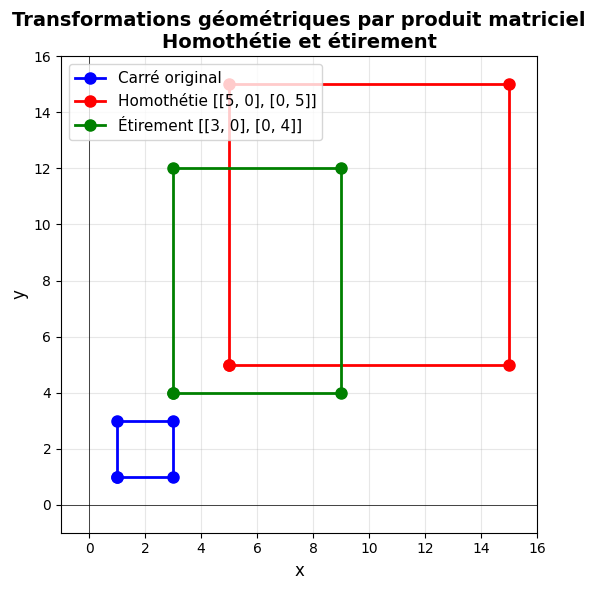

=== Transformations matricielles ===

Carré original :
[[1 1]
 [1 3]
 [3 3]
 [3 1]]

1. Matrice d'homothétie :
[[5 0]
 [0 5]]

Carré après homothétie :
[[ 5  5]
 [ 5 15]
 [15 15]
 [15  5]]

2. Matrice d’étirement :
[[3 0]
 [0 4]]

Carré après étirement :
[[ 3  4]
 [ 3 12]
 [ 9 12]
 [ 9  4]]

Interprétations :
- Homothétie [[5,0],[0,5]] : agrandissement uniforme de facteur 5
- Étirement [[3,0],[0,4]] : étirement différent selon x (×3) et y (×4)


In [7]:
# Exercice 6 : démo (ce n’est pas à vous de coder)
import matplotlib.pyplot as plt

# Définition des sommets du carré original (chaque ligne est un point [x, y])
carre_original = np.array([[1, 1], 
                           [1, 3], 
                           [3, 3], 
                           [3, 1]])

# Matrice de transformation : homothétie de facteur 5
matrice_homothetie = np.array([[5, 0], 
                                [0, 5]])

# Matrice d’étirement
matrice_etirement = np.array([[3, 0], 
                                  [0, 4]])

# Application de la transformation par homothétie
# On transpose pour avoir les points en colonnes, on multiplie, puis on retranpose
carre_homothetie = (matrice_homothetie @ carre_original.T).T

# Application de la transformation par étirement
carre_etirement = (matrice_etirement @ carre_original.T).T

# Fermeture des polygones pour le tracé (retour au premier point)
carre_original_ferme = np.vstack([carre_original, carre_original[0]])
carre_homothetie_ferme = np.vstack([carre_homothetie, carre_homothetie[0]])
carre_etirement_ferme = np.vstack([carre_etirement, carre_etirement[0]])

# Création de la figure
plt.figure(figsize=(6, 6))

# Tracé du carré original en bleu
plt.plot(carre_original_ferme[:, 0], carre_original_ferme[:, 1], 
         'o-', color='blue', linewidth=2, markersize=8, label='Carré original')

# Tracé du carré avec homothétie en rouge
plt.plot(carre_homothetie_ferme[:, 0], carre_homothetie_ferme[:, 1], 
         'o-', color='red', linewidth=2, markersize=8, label='Homothétie [[5, 0], [0, 5]]')

# Tracé du carré avec étirement en vert
plt.plot(carre_etirement_ferme[:, 0], carre_etirement_ferme[:, 1], 
         'o-', color='green', linewidth=2, markersize=8, label='Étirement [[3, 0], [0, 4]]')

# Configuration du graphique
plt.grid(True, alpha=0.3)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Transformations géométriques par produit matriciel\nHomothétie et étirement', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc='upper left')

# Affichage des axes passant par l'origine
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)

# Ajustement des limites pour bien voir les deux carrés avec aspect ratio égal
plt.xlim(-1, 16)
plt.ylim(-1, 16)
plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

# Affichage des informations dans la console
print("=== Transformations matricielles ===\n")
print("Carré original :")
print(carre_original)
print("\n1. Matrice d'homothétie :")
print(matrice_homothetie)
print("\nCarré après homothétie :")
print(carre_homothetie)
print("\n2. Matrice d’étirement :")
print(matrice_etirement)
print("\nCarré après étirement :")
print(carre_etirement)
print("\nInterprétations :")
print("- Homothétie [[5,0],[0,5]] : agrandissement uniforme de facteur 5")
print("- Étirement [[3,0],[0,4]] : étirement différent selon x (×3) et y (×4)")

### Exercice 6 : votre code !

Votre mission est de réécrire me code précédent pour réaliser les mêmes transformations, mais vous dans ce cas sans avoir le droit de modifier vos vecteurs lignes. Cela vous demande de faire le produit matriciel un peu différemment.
N’hésitez pas à poser le calcul pour un seul point sur papier pour bien voir quelles opérations faire et dans quel ordre (vous avez par contre le droit de modifier la matrice de transformation). 

In [8]:
#Exercice 6 : là, c’est votre code !

# Application de la transformation par homothétie
carre_homothetie = # VOTRE CODE

# Application de la transformation par étirement
carre_etirement = # VOTRE CODE

# Fermeture des polygones pour le tracé (retour au premier point)
carre_original_ferme = np.vstack([carre_original, carre_original[0]])
carre_homothetie_ferme = np.vstack([carre_homothetie, carre_homothetie[0]])
carre_etirement_ferme = np.vstack([carre_etirement, carre_etirement[0]])

# Création de la figure
plt.figure(figsize=(6, 6))

# Tracé du carré original en bleu
plt.plot(carre_original_ferme[:, 0], carre_original_ferme[:, 1], 
         'o-', color='blue', linewidth=2, markersize=8, label='Carré original')

# Tracé du carré avec homothétie en rouge
plt.plot(carre_homothetie_ferme[:, 0], carre_homothetie_ferme[:, 1], 
         'o-', color='red', linewidth=2, markersize=8, label='Homothétie [[5, 0], [0, 5]]')

# Tracé du carré avec étirement en vert
plt.plot(carre_etirement_ferme[:, 0], carre_etirement_ferme[:, 1], 
         'o-', color='green', linewidth=2, markersize=8, label='Étirement [[3, 0], [0, 4]]')

# Configuration du graphique
plt.grid(True, alpha=0.3)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Transformations géométriques par produit matriciel\nHomothétie et étirement', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc='upper left')

# Affichage des axes passant par l'origine
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)

# Ajustement des limites pour bien voir les deux carrés avec aspect ratio égal
plt.xlim(-1, 16)
plt.ylim(-1, 16)
plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

# Affichage des informations dans la console
print("=== Transformations matricielles ===\n")
print("Carré original :")
print(carre_original)
print("\n1. Matrice d'homothétie :")
print(matrice_homothetie)
print("\nCarré après homothétie :")
print(carre_homothetie)
print("\n2. Matrice d’étirement :")
print(matrice_etirement)
print("\nCarré après étirement :")
print(carre_etirement)
print("\nInterprétations :")
print("- Homothétie [[5,0],[0,5]] : agrandissement uniforme de facteur 5")
print("- Étirement [[3,0],[0,4]] : étirement différent selon x (×3) et y (×4)")

SyntaxError: invalid syntax (2677112043.py, line 4)

### Cisaillement (*shearing*)

On peut très bien se demander ce qu’il peut arriver si on place un facteur d’échelle non pas sur la diagonale de la matrice identité, mais à l’extérieur :

$$
\begin{bmatrix} 1 & S_x \\
                0 & 1
\end{bmatrix}
$$

Dans ce cas le calcul est le suivant :

$$  
    \begin{bmatrix} 1 & S_x \\
                0 & 1 
    \end{bmatrix} · 
    \begin{bmatrix} x \\ 
                    y
    \end{bmatrix} =
    \begin{bmatrix} 1·x + S_x·y \\
                0·x + 1·y 
    \end{bmatrix} =
    \begin{bmatrix} x + S_x·y \\
                     y 
    \end{bmatrix}
$$

### Exercice 7 : Quel est le résultat ?

Affichez le résultat de cette transformation avec $S_x = 5$ et testez un facteur $S_y = 5$ également.

In [9]:
# Exercice 7 : votre code !

# Définition des sommets du carré original (chaque ligne est un point [x, y])
carre_original = np.array([[1, 1], 
                           [1, 3], 
                           [3, 3], 
                           [3, 1]])

# Matrice de transformation : cisaillement
matrice_cisaillementX = # VOTRE CODE

# Matrice d’étirement
matrice_cisaillementY = # VOTRE CODE

# Application de la transformation par homothétie
carre_cisaillementX= # VOTRE CODE

# Application de la transformation par étirement
carre_cisaillementY = # VOTRE CODE

# Fermeture des polygones pour le tracé (retour au premier point)
carre_original_ferme = np.vstack([carre_original, carre_original[0]])
carre_cisaillementX_ferme = np.vstack([carre_cisaillementX, carre_cisaillementX[0]])
carre_cisaillementY_ferme = np.vstack([carre_cisaillementY, carre_cisaillementY[0]])

# Création de la figure
plt.figure(figsize=(6, 6))

# Tracé du carré original en bleu
plt.plot(carre_original_ferme[:, 0], carre_original_ferme[:, 1], 
         'o-', color='blue', linewidth=2, markersize=8, label='Carré original')

# Tracé du carré avec homothétie en rouge
plt.plot(carre_cisaillementX_ferme[:, 0], carre_cisaillementX_ferme[:, 1], 
         'o-', color='red', linewidth=2, markersize=8, label='Cisaillement x [[1, 5], [0, 1]]')

# Tracé du carré avec étirement en vert
plt.plot(carre_cisaillementY_ferme[:, 0], carre_cisaillementY_ferme[:, 1], 
         'o-', color='green', linewidth=2, markersize=8, label='Cisaillement y[[1, 0], [5, 1]]')

# Configuration du graphique
plt.grid(True, alpha=0.3)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Transformations géométriques par produit matriciel\nCisaillement axes x et y', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc='upper right')

# Affichage des axes passant par l'origine
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)

# Ajustement des limites pour bien voir les deux carrés avec aspect ratio égal
plt.xlim(-1, 20)
plt.ylim(-1, 20)
plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

# Affichage des informations dans la console
print("=== Transformations matricielles ===\n")
print("Carré original :")
print(carre_original)
print("\n1. Matrice de cisaillement selon x :")
print(matrice_cisaillementX)
print("\nCarré après cisaillement selon x :")
print(carre_cisaillementX)
print("\n2. Matrice de cisaillement selon y :")
print(matrice_cisaillementY)
print("\nCarré après cisaillement selon y :")
print(carre_cisaillementY)
print("\nInterprétations :")
print("- Cisaillement selon x [[1,5],[0,1]] : agrandissement uniforme de facteur 5")
print("- cisaillement selon y [[1,0],[5,1]] : étirement différent selon x (×3) et y (×4)")

SyntaxError: invalid syntax (1510139594.py, line 10)

On appele ces transformation « cisaillement » (*shearing*) pour une raison évidente : la figure semble étirée selon un axe mais avec une déformation caractéristique.

Pour le cisaillement selon x, on constate que plus y devient grand, plus x est affecté par la transformation (et vice-versa), ce qui crée la déformation. Il en est de même pour le cisaillement selon y. La déformation est proportionnelle selon la valeur de l’autre axe.

### Renversement selon les axes (miroir)

Revenons à la matrice identité et remplaçons l’un des « 1 » par un « -1 » :

$$
\begin{bmatrix} -1 & 0 \\
                0 & 1 
\end{bmatrix}. 
\begin{bmatrix} x \\ 
                y
\end{bmatrix} =
    \begin{bmatrix} -1·x + 0·y \\
                    x.0 + y.1 
\end{bmatrix} =
\begin{bmatrix} -x \\ 
                y 
\end{bmatrix}
$$
Le résultat est un renversement horizontal (symétrie par rapport à l’axe y).

La matrice pour un renversement vertical :
$$
\begin{bmatrix} 1 & 0 \\\ 
                0 & -1 \end{bmatrix}
$$

Vous pouvez, si vous le désirez, utiliser `matplotlib` pour réaliser ces transformations, mais leur simplicité les rend faciles à visualiser. 


In [13]:
# Bonus : codez une illustration des renversements si vous le souhaitez



### Rotation

On peut également réaliser des transformations qui correspondent à des rotations avec des matrices. La démonstration est plus longue, et ce cours n’est pas un cours d’infographie, je vais donc me contenter de vous donner la formule pour une matrice de rotation dans le sens horaire. Mais si vous voulez approfondir le sujet, voici un dépôt qui contient la démonstration https://github.com/Jehadel/2D_transformations_demo

La matrice de transformation dans le sens horaire est celle-ci : 

$$
    \begin{bmatrix} \cos \theta & \sin \theta \\ 
    - \sin \theta & \cos \theta \end{bmatrix}
$$

### Exercice 8 : rotation de 30° dans le sens horaire

Attention, les calculs se font en radian.

In [10]:
# Exercice 8 : votre code 


# Définition des sommets du carré original (chaque ligne est un point [x, y])
carre_original = np.array([[1, 1], 
                           [1, 3], 
                           [3, 3], 
                           [3, 1]])

# Angle de rotation en degrés et conversion en radians
theta_deg = # VOTRE CODE
theta_rad = # VOTRE CODE

# Matrice de rotation de 30° dans le sens horaire
matrice_rotation = # VOTRE CODE

# Application de la transformation par rotation
carre_rotation = # VOTRE CODE

# Fermeture des polygones pour le tracé (retour au premier point)
carre_original_ferme = np.vstack([carre_original, carre_original[0]])
carre_rotation_ferme = np.vstack([carre_rotation, carre_rotation[0]])

# Création de la figure
plt.figure(figsize=(6, 6))

# Tracé du carré original en bleu
plt.plot(carre_original_ferme[:, 0], carre_original_ferme[:, 1], 
         'o-', color='blue', linewidth=2, markersize=8, label='Carré original')

# Tracé du carré après rotation en rouge
plt.plot(carre_rotation_ferme[:, 0], carre_rotation_ferme[:, 1], 
         'o-', color='red', linewidth=2, markersize=8, label=f'Rotation de {theta_deg}°')

# Configuration du graphique
plt.grid(True, alpha=0.3)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title(f'Transformation géométrique : Rotation de {theta_deg}°', 
          fontsize=13, fontweight='bold')
plt.legend(fontsize=11, loc='upper left')

# Affichage des axes passant par l'origine
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)

# Ajustement des limites pour bien voir les deux carrés avec aspect ratio égal
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

# Affichage des informations dans la console
print("=== Transformation matricielle : Rotation ===\n")
print("Carré original :")
print(carre_original)
print(f"\nAngle de rotation : {theta_deg}° (sens trigonométrique)")
print(f"Angle en radians : {theta_rad:.4f} rad")
print("\nMatrice de rotation :")
print(matrice_rotation)
print("\nCarré après rotation :")
print(carre_rotation)
print("\nInterprétation : Cette matrice effectue une rotation de 30° dans le sens")
print("anti-horaire (trigonométrique) autour de l'origine.")

SyntaxError: invalid syntax (3436287170.py, line 11)

### Composition

Pourquoi est-il particulièrement intéressant de réaliser les transformations dans le plan en multipliant par une matrice ?

Tout simplement car on va pouvoir enchaîner les transformations (les composer) en enchaînant la même  opération : multiplier par une matrice carrée. Par exemple multiplier par une matrice d’homothétie, puis une matrice de rotation, puis une matrice de renversement correspondra à la réalisation de ces trois transformation. Mais, encore mieux si on multiplie ces trois matrices entre elles pour obtenir une seule matrice à la fin, alors cette matrice réalisera les trois opérations en multipliant par une seule matrice.

### Exercice 9 : composition

Écrivez un bout de code qui réalise les transformations qui permettent d’obtenir la figure suivante (vous pouvez déduire la valeur du cisaillement d’après la figure):

![Exercice de composition de transformation](./images/CompositionTransformations.png)

Réalisez cette transformation en utilisant dans un premier temps 3 matrices, puis répétez la transformation en utilisant une seule matrice. Comparez.

Attention, l’ordre des opérations est très important !

In [11]:
# Exerice 9 : Votre code !

import numpy as np
import matplotlib.pyplot as plt

# Définition des sommets du carré original
carre_original = np.array([[1, 1], 
                           [1, 3], 
                           [3, 3], 
                           [3, 1]])

# Définition des matrices de transformation
# 1. Shearing (cisaillement)
matrice_shearing = # VOTRE CODE

# 2. Flip vertical (renversement vertical)
matrice_flip = # VOTRE CODE

# 3. Rotation de 45° dans le sens horaire
theta_deg = # VOTRE CODE
theta_rad = # VOTRE CODE
matrice_rotation = # VOTRE CODE

# Application successive des transformations
# Étape 1 : Shearing
carre_shearing = # VOTRE CODE

# Étape 2 : Shearing puis Flip
carre_shearing_flip = # VOTRE CODE

# Étape 3 : Shearing puis Flip puis Rotation (composition complète)
carre_final = # VOTRE CODE

# Calcul de la matrice de composition (produit des trois matrices)
matrice_composee = # VOTRE CODE

# Vérification : application directe de la matrice composée
carre_final_direct = # VOTRE CODE

# Fermeture des polygones pour le tracé
carre_original_ferme = np.vstack([carre_original, carre_original[0]])
carre_shearing_ferme = np.vstack([carre_shearing, carre_shearing[0]])
carre_shearing_flip_ferme = np.vstack([carre_shearing_flip, carre_shearing_flip[0]])
carre_final_ferme = np.vstack([carre_final, carre_final[0]])

# Création de la figure
plt.figure(figsize=(8, 8))

# Tracé des différentes étapes
plt.plot(carre_original_ferme[:, 0], carre_original_ferme[:, 1], 
         'o-', color='blue', linewidth=2, markersize=8, label='Original', alpha=0.7)

plt.plot(carre_shearing_ferme[:, 0], carre_shearing_ferme[:, 1], 
         'o-', color='green', linewidth=2, markersize=8, label='Après shearing', alpha=0.7)

plt.plot(carre_shearing_flip_ferme[:, 0], carre_shearing_flip_ferme[:, 1], 
         'o-', color='orange', linewidth=2, markersize=8, label='Après flip vertical', alpha=0.7)

plt.plot(carre_final_ferme[:, 0], carre_final_ferme[:, 1], 
         'o-', color='red', linewidth=2.5, markersize=10, label='Après rotation (final)', alpha=0.9)

# Configuration du graphique
plt.grid(True, alpha=0.3)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Composition de transformations matricielles\nShearing → Flip vertical → Rotation 45°', 
          fontsize=13, fontweight='bold')
plt.legend(fontsize=10, loc='upper left')

# Affichage des axes passant par l'origine
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)

# Ajustement des limites
plt.xlim(-4, 10)
plt.ylim(-10, 6)
plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

# Affichage des informations dans la console
print("=" * 60)
print("COMPOSITION DE TRANSFORMATIONS MATRICIELLES")
print("=" * 60)

print("\nCarré original :")
print(carre_original)

print("\n" + "-" * 60)
print("ÉTAPE 1 : SHEARING (cisaillement)")
print("-" * 60)
print("Matrice :")
print(matrice_shearing)
print("\nCarré après shearing :")
print(carre_shearing)

print("\n" + "-" * 60)
print("ÉTAPE 2 : FLIP VERTICAL (renversement)")
print("-" * 60)
print("Matrice :")
print(matrice_flip)
print("\nCarré après shearing + flip :")
print(carre_shearing_flip)

print("\n" + "-" * 60)
print("ÉTAPE 3 : ROTATION 45° (sens horaire)")
print("-" * 60)
print("Matrice :")
print(matrice_rotation)
print("\nCarré final :")
print(carre_final)

print("\n" + "=" * 60)
print("COMPOSITION : Matrice unique équivalente")
print("=" * 60)
print("Matrice composée = Rotation × Flip × Shearing")
print(matrice_composee)

print("\nVérification : application directe de la matrice composée")
print("(doit donner le même résultat que les étapes successives)")
print(carre_final_direct)

print("\nDifférence (doit être proche de zéro) :")
print(np.max(np.abs(carre_final - carre_final_direct)))

SyntaxError: invalid syntax (2926492656.py, line 14)

### Pour aller plus loin

Les transformations telles qu’on les a présentées ici ont quelques limites pour être utilisées pour les transformations géométriques appliquées, comme la manipulation d’image (infographie). En effet on constate :
* pour la mise à l’échelle/homothétie : la figure augmente/diminue de taille, mais cela affecte également sa position, on aimerait pour voir modifier sa taille en la maintenant à la même position
* pour le cisaillement, le problème est le même, la figure est étirée mais cela provoque aussi un déplacement de cette figure
* les renversements se font toujours par rapport aux axes (et non par rapport à un axe de référence sur la figure)
* les rotations  se font toujours par rapport à l’origine des axes (et non par rapport à un point de référence sur la figure)
* et la difficulté principale : on n’a pas trouvé de matrice de transformation qui réalisait une translation (pour cela on fait plutôt des additions)

Il y a un moyen de résoudre ces problèmes, par une petite astuce qui consiste à utiliser des vecteurs à 3 dimensions et des matrices (3, 3) même si on en 2D : cette dimension supplémentaire nous permet d’introduire des termes constants qui vont permettre de réaliser des calculs plus libre du point de vue de la translation et des points de référence. Le principe sera d’ailleurs le même en 3D, où va utiliser des matrices (4, 4) et des vecteurs de dimension 4 : ce sont les fameux quaternions que nous avons déjà évoqués et étudiés par Hamilton au XIXe siècle.

Mais il ne s’agit pas d’un cours d’infographie, vous pourrez étancher votre curiosité sur ce dépôt si le sujet vous intéresse : https://github.com/Jehadel/3x3-2D-transformations_demo

En ce qui nous concerne, poursuivons notre programme d’algèbre linéaire avec les transformations linéaires et les projections, concepts qui seront plus faciles à appréhender après tout ce temps passé à réaliser des transformations géométriques avec des matrices.

## Transformations linéaires, projections et bases

### Transformation linéaire

Après toutes les manipulations géométriques que nous venons de réaliser, la notion de transformation linéaire devrait vous être connu intuitivement.

#### Définition

En réalité, une **transformation linéaire** est une fonction $T: \mathbb{R}^n \rightarrow \mathbb{R}^m$ qui peut s'écrire comme un produit matrice-vecteur :

$$y = Ax$$

où $A$ est une matrice $m \times n$.

On appelle parfois les transformations linéaires des transformation matricielle.

C’est ce que nous venons de faire dans le plan avec des matrices carrées, qui transformaient un vecteur du plan en un autre vecteur du plan. Une matrice de dimension (m, n) va transformer un vecteur de dimension n en vecteur de dimension m. Nous avons simplement généralisé la notion. On parle de transformation linéaire car elle possède cetaines propriétés.

### Propriétés de linéarité

Une transformation $T$ est linéaire si elle satisfait :
1. $T(u + v) = T(u) + T(v)$ (additivité)
2. $T(\alpha v) = \alpha T(v)$ (homogénéité)

Ce sont des propriétés que vérifie le produit matrice-vecteur.

Ci-dessous des bouts de code qui produisent d’autres illustrations de ce principe par des transformations dans le plan qu’on a vu plus dans la section précédente (rotation, homothétie, cisaillement) mais qui met en avant le fait que ces transformations s’appliquent à tous les vecteurs du plan :

Matrice de rotation (45°) :
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


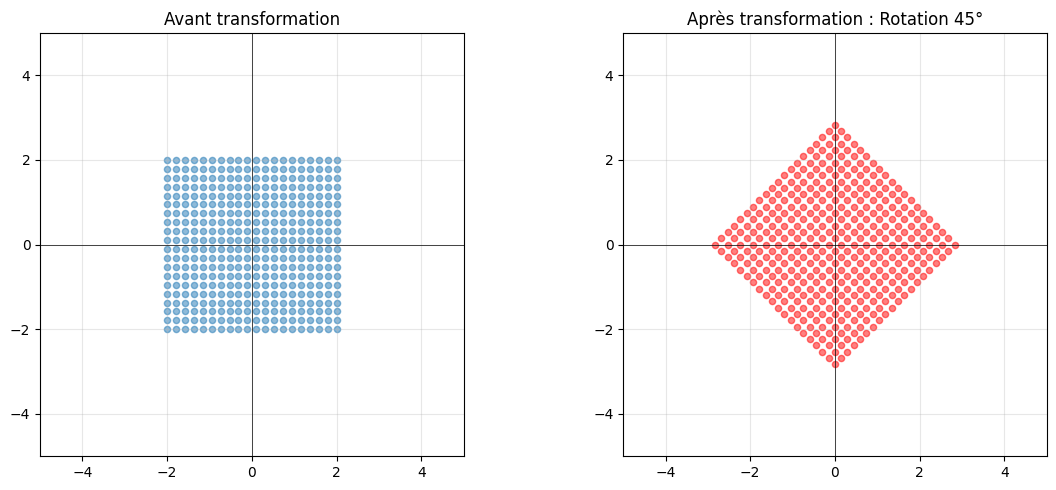

In [17]:
# Visualisation de transformations linéaires en 2D

def plot_transformation(A, title):
    """Visualiser l'effet d'une transformation linéaire"""
    # Créer une grille de points
    x = np.linspace(-2, 2, 20)
    y = np.linspace(-2, 2, 20)
    X_grid, Y_grid = np.meshgrid(x, y)
    
    # Points originaux
    points = np.vstack([X_grid.ravel(), Y_grid.ravel()])
    
    # Appliquer la transformation
    transformed = A @ points
    
    # Créer la figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Avant transformation
    ax1.scatter(points[0], points[1], alpha=0.5, s=20)
    ax1.set_xlim(-5, 5)
    ax1.set_ylim(-5, 5)
    ax1.set_aspect('equal')
    ax1.grid(True, alpha=0.3)
    ax1.set_title('Avant transformation')
    ax1.axhline(y=0, color='k', linewidth=0.5)
    ax1.axvline(x=0, color='k', linewidth=0.5)
    
    # Après transformation
    ax2.scatter(transformed[0], transformed[1], alpha=0.5, s=20, color='red')
    ax2.set_xlim(-5, 5)
    ax2.set_ylim(-5, 5)
    ax2.set_aspect('equal')
    ax2.grid(True, alpha=0.3)
    ax2.set_title(f'Après transformation : {title}')
    ax2.axhline(y=0, color='k', linewidth=0.5)
    ax2.axvline(x=0, color='k', linewidth=0.5)
    
    plt.tight_layout()
    plt.show()

# 1. Rotation de 45°
theta = np.pi/4
R = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta),  np.cos(theta)]
])
print("Matrice de rotation (45°) :")
print(R)
plot_transformation(R, "Rotation 45°")

Matrice d'homothétie :
[[2.  0. ]
 [0.  0.5]]


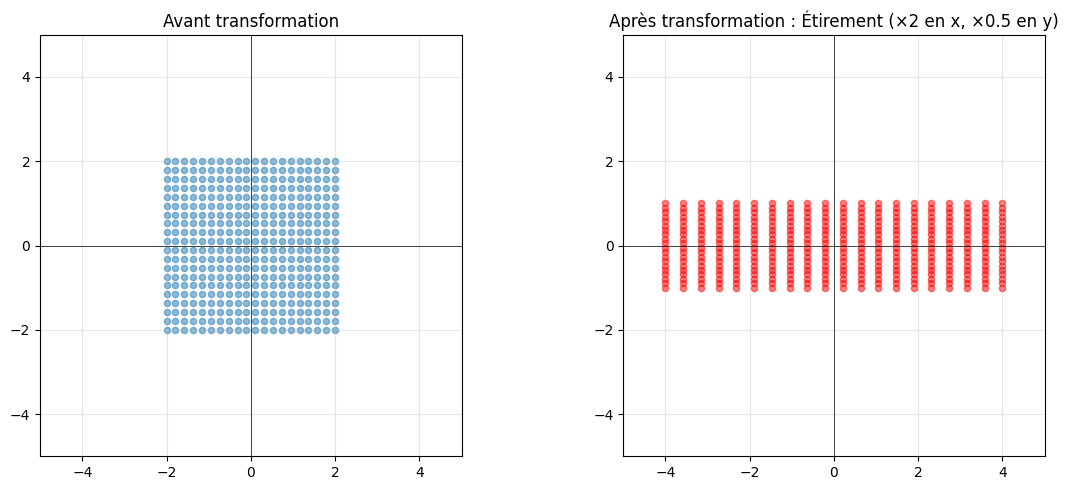

In [18]:
# 2. Homothétie (scaling)
S = np.array([
    [2, 0],
    [0, 0.5]
])
print("Matrice d'homothétie :")
print(S)
plot_transformation(S, "Étirement (×2 en x, ×0.5 en y)")

Matrice de cisaillement :
[[1.  0.5]
 [0.  1. ]]


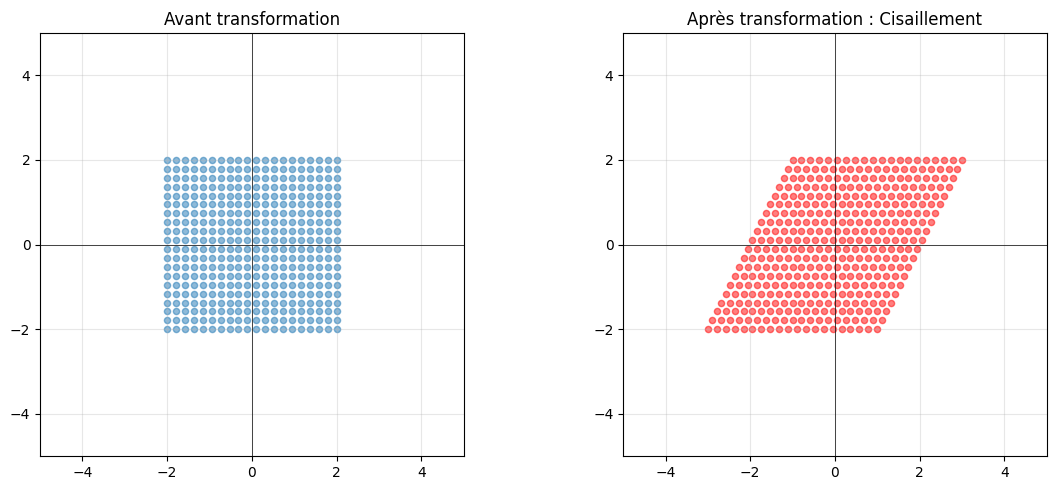

In [19]:
# 3. Cisaillement (shear)
Shear = np.array([
    [1, 0.5],
    [0, 1]
])
print("Matrice de cisaillement :")
print(Shear)
plot_transformation(Shear, "Cisaillement")

Mais si ces illustrations, parce que dans le plan, sont faciles à produire et assez parlantes, il ne faut pas qu’elle nourrissent la croyance qu’une transformation linéaire transforme seulement un vecteur en un autre vecteur du même espace. Par exemple la matrice :

$$
\begin{bmatrix}1 & 0 \\
               0 & 1 \\
               1 & 0
\end{bmatrix}
$$

de dimension (3, 2) transforme un vecteur de dimension 2, soit une  matrice (2, 1), en un vecteur de dimension 3, soit une matrice (3,1) :


$$
\begin{bmatrix} 1 & 0 \\
               0 & 1 \\
               1 & 0
\end{bmatrix} ·
\begin{bmatrix}x \\
               y 
\end{bmatrix} =
\begin{bmatrix} 1·x + 0·y \\
               0·x + 1·y \\
               1·x + 0.y
\end{bmatrix} = 
\begin{bmatrix} x \\
               y \\
               x
\end{bmatrix}
$$

C’est aussi une transformation linéaire.

Ensuite, il existe des transformation qui ne sont pas linéaires. Supposons une transformation qui transforme un vecteur à 2 dimensions en un autre vecteur de dimension 2 de la manière suivante :
$$
\begin{bmatrix}x \\
               y 
\end{bmatrix} \longmapsto
\begin{bmatrix}x^3 \\
               e^y 
\end{bmatrix} 
$$

Ce ne sera pas une transformation linéaire, et aucune matrice ne permettra de transformer $x$ en $x^3$ et $y$ en $e^y$.

En fait faire un produit matriciel c’est exprimer les composantes d’un vecteur comme une somme de produit par des coefficients, c’est créer un vecteur dont les composantes sont une combinaison linéaire (ce qui n’est pas le cas dans le contre-exemple précédent). Alors, comment savoir si une transformation donnée est linéaire  (donc réalisable par une matrice) ? Il suffit de vérifier les propriété d’additivité et d’homégénéité vues précédemment.


### Bases et projections

La notion de projection va être extrêmement importante pour la suite de ce cours où notre objectif est de coder un algorithme de réduction de dimensions (analyse en composantes principales) mais c’est aussi une notion importante pour le machine learning en général. 

Pour le dire en langage ordinaire, la **projection** consiste à "rabattre" un point sur un sous-espace (une droite, un plan, etc.).

Dans notre propos, la notion de projection sera fortement liée à celle de base.

La base que nous connaissons intuitivement ou parce que nous l’avons souvent manipulée au lycée (et normalement au collège aussi) est la base orthonormée du plan, avec les fameux axes x et y

![Base orthonormée et projection de vecteurs](./images/BaseOrthonormee.png)

Comme bien des fois nous allons voir que l’algèbre linéaire pose un cadre qui permet de généraliser des notions intuitives ou courantes qui ne se révèlent souvent être que des cas particuliers.

Nous avons l’habitude d’utiliser les coordonnées cartésiennes, et nous l’avons fait jusqu’ici : nous avons représenté les vecteurs par un couple de valeur x et y, coordonnées dans un repère orthonormé du plan.
Mais un vecteur peut être caractérisé d’une autre manière : sa norme (longueur) et l’angle θ qu‘il fait avec l’un des axes. En écrivant les choses de cette manière, on se rend compte la valeur de x et y correspond à en fait à la projection du vecteur respectivement sur les axes x et y du plan, que l’on peut exprimer en fonction de la norme du vecteur et de l’angle θ.

Nous avons vu au chapitre précédent que l’on peut calculer une projection à l’aide du produit scalaire entre deux vecteurs : 
* le produit scalaire retournt un scalaire qui indique la longueur du vecteur obtenu après projection
* la direction du vecteur obtenu après projection est celle du vecteur sur lequel il est projeté : il suffit donc de multiplier ce dernier vecteur par le résultat du produit scalaire pour obtenir le vecteur après projection 

Ici, pour calculer les projections sur les axes x et y, nous allons – comme l’illustre le schéma ci-dessus – considérer des vecteurs unitaires (dont la norme est 1) et dont les directions sont celles des axes x et y, respectivement. Le fait que la norme de ces vecteurs vaut 1 fait qu’elle va être « transparente » dans le calcul des produits scalaires (ils n’affecteront pas la norme du nouveau vecteur), qui permettront de calculer les projections qui correspondront aux coordonnées du vecteur projeté sur les axes x et y que nous auront choisi.

Soit $u$ un **vecteur unitaire** ($\|u\| = 1$).

La **projection** d'un vecteur $v$ sur $u$ est :

$$\text{proj}_u(v) = \langle v, u \rangle u = (v^T u) u $$

- **Composante scalaire** : $v^T u$ (longueur de la projection)
- **Vecteur projeté** : $(v^T u) u$

Voici un petit exercice pour illustrer cela, avec tout d’abord, une fonction qui calcule la projection d’un  vecteur quelconque sur un vecteur unitaire donné :

In [70]:
# Projection d’un  vecteur v sur un vecteur unitaire u

def project_on_vector(v, u):
    """
    Projeter v sur le vecteur unitaire u
    """
    # Normaliser u (au cas où)
    u = u / np.linalg.norm(u)
    
    # Composante scalaire (longueur de la projection)
    scalar_proj = np.dot(v, u)
    
    # Vecteur projeté
    vector_proj = scalar_proj * u
    
    return scalar_proj, vector_proj

# Exemple
v = np.array([3, 4])
u = np.array([1, 0])  # projeter sur l'axe x

scalar, proj = project_on_vector(v, u)
print(f"Vecteur v : {v}")
print(f"Direction u : {u}")
print(f"\nComposante scalaire : {scalar}")
print(f"Vecteur projeté : {proj}")

Vecteur v : [3 4]
Direction u : [1 0]

Composante scalaire : 3.0
Vecteur projeté : [3. 0.]


### Exercice 10 : visualiser les projections
À l’aide de la fonction `project_on_vector()` précédente, réalisez une fonction pour visualiser les projections de vecteur (v et u, u est par défaut un vecteur unité de l’axe x)
* Cette fonction prend en arguments deux vecteurs v et et u (dimension 2, par défaut u sera le vecteur [1, 0]))
* Elle calcule la projection de v sur u
* Elle affiche sur une figure matplotlib :
    * Le vecteur v (en bleu)
    * Le vecteur u (en vert)
    * Le vecteur résultant de la projection (en rouge)
    * Une « ligne de projection » en pointillée (méthode `plt.plot`avec l’argument `linestyle = '--'`), pour aider à visualiser la projection

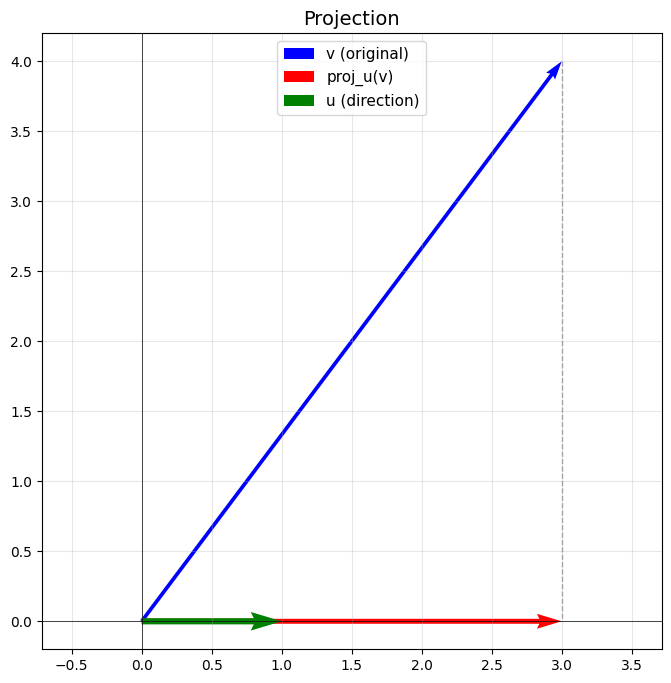

In [64]:
# Exerice : Visualisation de la projection

def visualize_projection(#VOTRE CODE)):
    """Visualiser la projection de x sur u"""
    u = u / np.linalg.norm(u) 
    scalar, proj = # VOTRE CODE
    
    plt.figure(figsize=(8, 8))
    
    # Vecteur original v (avec quiver)
    # VOTRE CODE
    
    # Projection
   # VOTRE CODE

        # Direction de projection, soit le vecteur u (on l’affiche en dernier pour mieux la voir)
    # VOTRE CODE
    
    # Ligne de projection (perpendiculaire en pointillée)
    # VOTRE CODE
    
    plt.xlim(-1, 5)
    plt.ylim(-1, 5)
    plt.axhline(y=0, color='k', linewidth=0.5)
    plt.axvline(x=0, color='k', linewidth=0.5)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=11)
    plt.title('Projection', fontsize=14)
    plt.axis('equal')
    plt.show()

# Exemple 1 : projection sur l'axe x
x = np.array([3, 4])
u = np.array([1, 0])
visualize_projection(x, u)

### 💡 Exercice 11 : Projections

Soit $v = [2, 3]$ et deux directions :
- $u_1 = [1, 0]$ (axe x)
- $u_2 = [0, 1]$ (axe y)

- a) Calculez la projection de $v$ sur $u_1$
- b) Calculez la projection de $v$ sur $u_2$
- c) Vérifiez que $\text{proj}_{u_1}(v) + \text{proj}_{u_2}(v) = v$

In [12]:
# Exercice 11 : Votre code ! 

v = np.array([2, 3])
u1 = np.array([1, 0])
u2 = np.array([0, 1])

print(f"v = {v}")

# a) Projection sur u1


# b) Projection sur u2


# c) Vérification


v = [2 3]


### Projection matricielle

La projection sur un vecteur unitaire $u$ peut aussi s'écrire avec une matrice :

$$
P = u·u^T \\
\text{Alors : }P·v = u·u^T·v = (u^T·v)·u = Proj_u(v)
$$

**Propriété importante** : $P^2 = P$ (idempotence) : une fois qu’un vecteur a été projeté, la même projection a pour résultat le vecteur déjà projeté (vu que les aures composantes ont disparu dans l’opération).

Une matrice de projection, appliquée deux fois, donne le même résultat.

Tout ce que nous venons de voir avec les axes du repère cartésien classique devrait nous interroger : si les coordonnées d’un vecteur sont en fait les projections sur d’autres vecteurs (unitaires) qui caractérisent un repère, en fait on pourrait très bien calculer les coordonnées d’un même vecteur dans différents repères, chacun  caractérisé par une paire (en 2D) de vecteurs unitaires associés. Et en fait rien n’oblige à ce que ces vecteurs soit orientés de telle ou telle manière, leur orientation peut être quelconque. Un vecteur unitaire orienté à 45° dans un repère donné peut très bien définir l’axe d’un autre repère sur lequel on peut parfaitement réaliser des projections et donc calculer de nouvelles coordonnées :

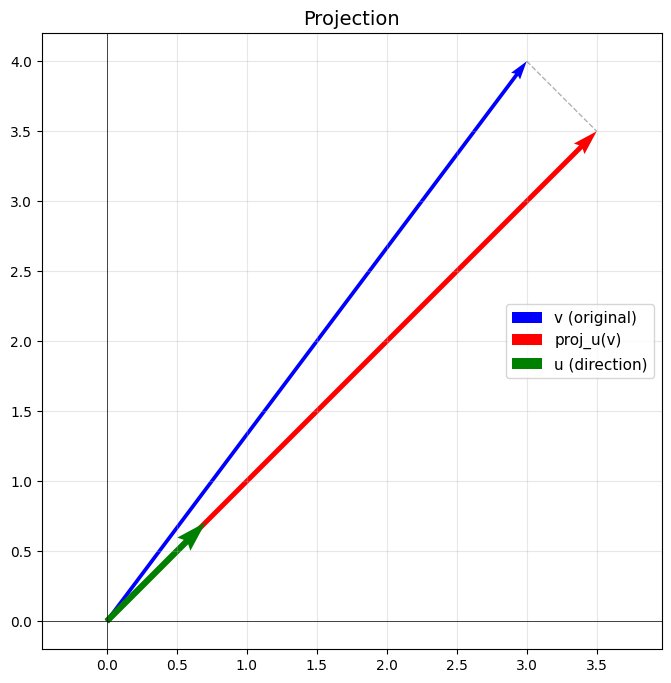

In [65]:
# Projection sur une direction quelconque
v = np.array([3, 4])
u = np.array([1, 1]) / np.sqrt(2)  # direction à 45°
visualize_projection(v, u)

Voilà qui nous amène à la notion de base.

### Base orthonormée ou canonique

Si nous poussons notre réflexion précédente un peu plus loin, on peut très bien imaginer que l’on puisse exprimer les coordonnées des vecteurs dans des repères basés sur une paire de vecteurs quelconques, qui pointent dans des directions différentes. Par exemple : 

![Base quelconque](./images/BaseQuelconque.png)

Si ces vecteurs qui forment la base ne sont pas orthogonaux, alors la projection de l’un sur l’autre est différente du vecteur nul. Cela signifique que la projection sur l’un de ces vecteurs aurant une composante projetable sur l’autre vecteur, et donc que les composantes des vecgteurs ne peuvent pas être linéairement indépendantes (une variation de l’une, modifiera immanquablement les autres).

Par contre, si ces vecteurs qui forment la base sont orthogonaux, alors la projection sur l’un des vecteur sera totalement indépendante de celle sur l’autre vecteur (vu que le produit scalaire de deux vecteurs orthogonaux est nul), la somme des projections sera égale au vecteur projeté (ce que nous avons vu dans l’exercice 11). On parlera de base orthonormée (ou canonique) définie sur $\mathbb{R}^n$ comme suit :

$$
v =
\begin{bmatrix} v_1 \\
                v_2 \\
                v_3 \\
                \vdots \\
                v_n
\end{bmatrix} = v_1·e_1 + v_2·e_2 + v_3·e_3 + … + v_n·e_n \\
\text{avec }
e_1 = \begin{bmatrix} 1 \\
                0 \\
                0 \\
                \vdots \\
                0
\end{bmatrix},
e_2 = \begin{bmatrix} 0 \\
                1 \\
                0 \\
                \vdots \\
                0
\end{bmatrix},
e_3 = \begin{bmatrix} 0 \\
                0 \\
                1 \\
                \vdots \\
                0
\end{bmatrix}, 
…, 
e_n = \begin{bmatrix} 0 \\
                0 \\
                0 \\
                \vdots \\
                1
\end{bmatrix}
$$

Une écriture plus rigoureuse pour définir la base serait celle-ci :

une **base orthonormée** est un ensemble de vecteurs $u_1, u_2, \cdots, u_p$ qui sont :
- **Orthogonaux** : $\langle u_i, u_j \rangle = 0$ si $i \neq j$
- **Normés** : $\|u_i\| = 1$

On peut résumer ces conditions avec le **delta de Kronecker** (qui est une fonction particulière qui prend pour valeur 1 si certaines conditions sont réunies, 0 sinon) :

$$\langle u_i, u_j \rangle = \delta_{ij} = \begin{cases} 1 & \text{si } i = j \\ 0 & \text{si } i \neq j \end{cases}$$

Ce sont ces bases qui nous intéresseront dans la suite du cours, du fait de leurs propriétés au regard des transformations linéaires.

Une propriété intéressante de l’orthogonalité va concerner les matrices :

$A$ de dimension (n, n) est une matrice orthogonale si elle vérifie l’égalité : $A^T·A = I_n$

En d’autres termes, l’inverse de $A$ n’est rien d’autres que sa transposée : $A^{-1} = A^T$

### Changement de base

#### Linéarité

Nous venons de voir que les bases orthonormés permettaient une composition indépendamment linéaire des vecteurs.  

Par ailleurs, rappelons qu’est linéaire toute transformations qui satisfait :
* $T(u + v) = T(u) + T(v)$
* $T(\alpha v) = \alpha T(v)$

Rappelons aussi que les transformations matricielles vérifient ces conditions.

De cette définition, nous pouvons déduire la propriété suivante :
$$
\forall u, v \in \mathbb{R}^n, \forall \alpha, \beta \in \mathbb{R} \text{ :} \qquad T(\alpha·u + \beta·v) = \alpha·T(u) + \beta·T(v)
$$

Il vient immédiatemment de ce que nous venons de voir plus haut : 

$$
T(v) = T(v_1·e_1 + v_2·e_2 + v_3·e_3 + … + v_n·e_n) = v_1·T(e_1) + v_2·T(e_2) + v_3·T(e_3) + \cdots + v_n·T(e_n)
$$

On constate donc que transformer un vecteur revient en fait à transformer sa base : on peut donc transformer facilement n’importe quel vecteur d’une base donnée.

#### Matrices et changement de base

Imaginons une matrice $A$, et concentrons nous sur ses $n$ colonnes $C_i$ :  

$$
A = \begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & \cdots & a_{nn} 
\end{bmatrix} = 
\begin{bmatrix}
\vdots & \vdots & \cdots & \vdots \\
C_1 & C_2 & \cdots & C_n \\
\vdots & \vdots & \cdots & \vdots \\
\end{bmatrix}
$$

Si on considère un vecteur $e_i$ d’une base orthonormée, on constate rapidement par le calcul du produit matriciel que :
$$
A·e_i = \begin{bmatrix}
\vdots & \vdots & \cdots & \vdots \\
C_1 & C_2 & \cdots & C_n \\
\vdots & \vdots & \cdots & \vdots \\
\end{bmatrix} · 
\begin{bmatrix}
0 \\
\vdots \\
1\\
\vdots \\
0
\end{bmatrix} = C_i
$$

En fait cela revient à sélectionner la i<sup>ème</sup> colonne de la matrice : l’action de la matrice (transformation linéaire) sur le i<sup>ème</sup> vecteur de la base est donné par la i<sup>ème</sup> colonne.

Dans le même ordre d’idée, si on crée une matrice dont les colonnes sont constituées par les transformations linéaires d’une base canonique :
$$
A = \begin{bmatrix}
\vdots & \vdots & \cdots & \vdots \\
T(e_1) & T(e_2) & \cdots & T(e_n) \\
\vdots & \vdots & \cdots & \vdots \\
\end{bmatrix}
$$

Alors tout simplement :

$$
T(v) = A·v
$$

Nous allons voir dans la prochaine section pourquoi les changements de base sont si important lorsque l’on va vouloir réaliser des réductions de dimension (si vous avez été assez attentif-ve, vous devez bien vous douter que réduire les dimensions = projeter vers un espace « réduit » en dimension). Ce que nous venons de voir – et qui peut vous sembler un peu abstrait – c’est que tout le but du jeux va être de trouver la « bonne » matrice pour passer d’une base à l’autre.

Voyons cela de manière un peu opérationnelle avec un exercice en deux étapes (1) réaliser un changement de base à l’aide d’une opération matricielle, (2) visualiser ce changement.

#### Exercice 12a : changement de base

* soit la base canonique $e_1 = [1, 0]^T$ et $e_2 = [0, 1]^T$ de $\mathbb{R}^2$
* soit une nouvelle base $u_1 = [\frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}}]^T$ et $u_2 = [\frac{-1}{\sqrt{2}}, \frac{1}{\sqrt{2}}]^T$ qui est simplement issue d’une rotation à 45° de la base (pour comprendre d’ou vient $\sqrt{2}$ dessiner la diagonale d’un carré de côté 1 et appliquer pythagore pour connaître sa longueur)
* soit un vecteur $v$ de coordonnée $[3, 4]^T$ dans la base canonique

Réalisez les étapes suivantes :
* vérifiez que $(u_1, u_2)$ est orthonormée
* créez une matrice $U$ de changemnet de base à partir des vecteurs $u_1$ et $u_2$
* calculez les coordonnées de $v$ dans la nouvelle base
* faites l’opération inverse : à partir de ces nouvelles coordonnées, calculez les coordonnées de v dans la base canonique (c’est juste pour montrer qu’on peut faire l’opération dans les deux sens)
* testez que l’on retombe bien sur le vecteur d’origine


In [10]:
# Changement de base - Exemple

# Base canonique de ℝ²
e1 = np.array([1, 0])
e2 = np.array([0, 1])

# Nouvelle base (rotation de 45°)
u1 = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
u2 = np.array([-1/np.sqrt(2), 1/np.sqrt(2)])

# Vecteur v dans la base canonique
v = np.array([3, 4])
print(f"\nv dans base canonique : {v}")

# Vérifier que (u1, u2) est une base orthonormée
print("Vérification base orthonormée :")
print(f"⟨u1, u1⟩ = {np.dot(u1, u1):.4f} (doit être 1)")
print(f"⟨u2, u2⟩ = {np.dot(u2, u2):.4f} (doit être 1)")
print(f"⟨u1, u2⟩ = {np.dot(u1, u2):.4f} (doit être 0)")

# Matrice de changement de base
U = np.column_stack([u1, u2])
print("\nMatrice U (colonnes = vecteurs de la base) :")
print(U)


# Coordonnées dans la nouvelle base
new_coord = U.T @ v
print(f"Coordonnées dans nouvelle base : U^T·v = {new_coord}")

# Reconstruction
v_reconstructed = U @ new_coord
print(f"Reconstruction : v = U·new_coord = {v_reconstructed}")

#test
print(f"Égal à l'original ? {np.allclose(v, v_reconstructed)}")


v dans base canonique : [3 4]
Vérification base orthonormée :
⟨u1, u1⟩ = 1.0000 (doit être 1)
⟨u2, u2⟩ = 1.0000 (doit être 1)
⟨u1, u2⟩ = 0.0000 (doit être 0)

Matrice U (colonnes = vecteurs de la base) :
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Coordonnées dans nouvelle base : U^T·v = [4.94974747 0.70710678]
Reconstruction : v = U·new_coord = [3. 4.]
Égal à l'original ? True


#### Exercice 12b : visualisation

Complètez le code ci-dessous pour visualiser le changement de base :

* dans la première figure, complèter les méthodes `ax1.quiver()` pour afficher la base canonique en vert et le vecteur $v$ en bleu
* dans la seconde figure, complèter les méthodes `ax2.quiver()` pour afficher la base après rotation de 45° en rouge et le vecteur transformé $v$ en bleu (à partir des coordonnées `new_coord` bien sûr)
* dans la seconde figure, affichez également par des lignes en pointillé de couleur noire ou grise la projection du vecteur $v$ sur les deux axes définis par les vecteurs $u_1$ et $u_2$

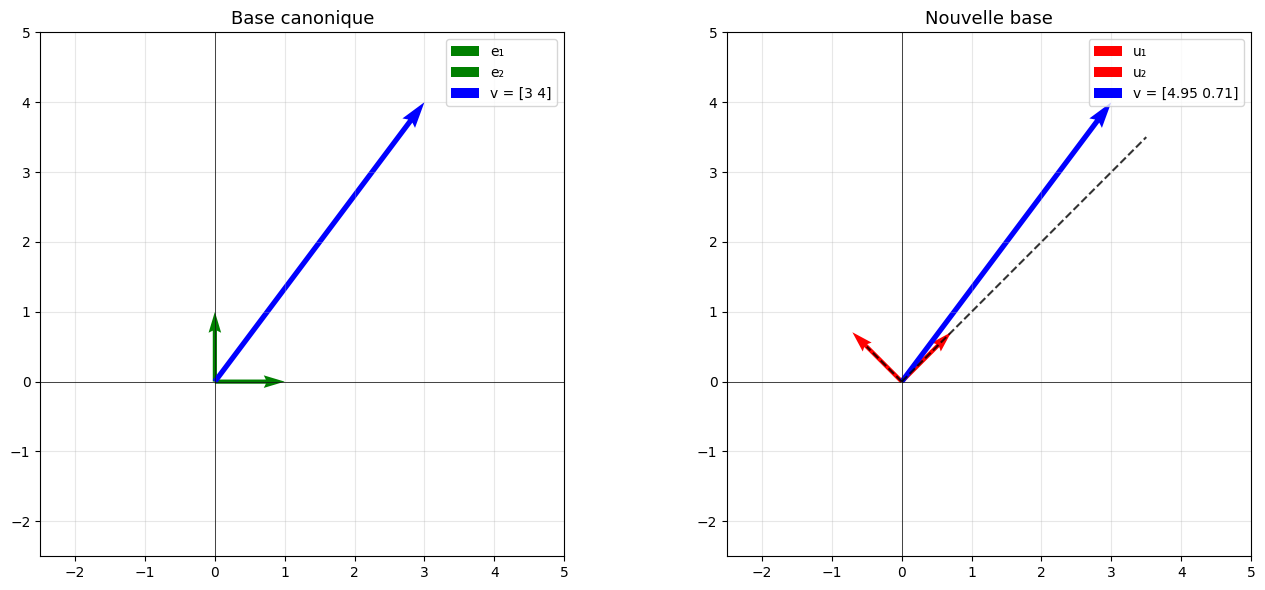

Dans la base canonique : v = [3 4]
Dans la nouvelle base : new_coord = [4.94974747 0.70710678]


In [15]:
# Visualisation du changement de base

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Base canonique
ax1.quiver(0, 0, e1[0], e1[1], angles='xy', scale_units='xy', scale=1,
           color='green', width=0.008, label='e₁')
ax1.quiver(0, 0, e2[0], e2[1], angles='xy', scale_units='xy', scale=1,
           color='green', width=0.008, label='e₂')
ax1.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1,
           color='blue', width=0.01, label=f'v = {v}')

ax1.set_xlim(-2.5, 5)
ax1.set_ylim(-2.5, 5)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_title('Base canonique', fontsize=13)
ax1.set_aspect('equal')

# Nouvelle base
ax2.quiver(0, 0, u1[0], u1[1], angles='xy', scale_units='xy', scale=1,
           color='red', width=0.008, label='u₁')
ax2.quiver(0, 0, u2[0], u2[1], angles='xy', scale_units='xy', scale=1,
           color='red', width=0.008, label='u₂')
ax2.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1,
           color='blue', width=0.01, label=f'v = {new_coord.round(decimals=2)}')

# Projections sur nouvelle base
ax2.plot([0, new_coord[0]*u1[0]], [0, new_coord[0]*u1[1]], 'k--', alpha=0.8)
ax2.plot([0, new_coord[1]*u2[0]], [0, new_coord[1]*u2[1]], 'k--', alpha=0.8)

ax2.set_xlim(-2.5, 5)
ax2.set_ylim(-2.5, 5)
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.axvline(x=0, color='k', linewidth=0.5)
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_title(f'Nouvelle base', fontsize=13)
ax2.set_aspect('equal')

plt.tight_layout()
plt.show()

print(f"Dans la base canonique : v = {v}")
print(f"Dans la nouvelle base : new_coord = {new_coord}")

Bravo ! Nous disposons maintenant de (presque) toutes les bases mathématiques pour réaliser une ACP. Nous avons encore une ou deux notions importantes à découvrir, mais tout d’abord voyons la logique derrière cette réduction de dimension pour bien comprendre comment nous allons résoudre le problème. Pour cela, il va falloir parler à nouveau de la variance.

## Variance, covariance, et changement de base

### Rappels sur la variance et la covariance

#### Variance univariée

La **variance** mesure la dispersion d'une variable autour de sa moyenne :

$$\text{Var}(X) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2$$

Plus la variance est élevée, plus les données sont dispersées.

S’il n‘y avait pas de variance, cela voudrait dire que toutes les observations auraient la même valeur. D’une certaine manière, la variance nous donne une information : nous observons des variations qui :

* sont causées par les variations d’une ou plusieurs autres variables (ce sont les modèles que nous essayons d’établir pour *expliquer* ces variations)
* provoque les variations d’une ou plusieurs autres variables

Cela nous amène à la notion de covariance.

#### Covariance entre deux variables

La **covariance** mesure comment deux variables varient ensemble :

$$\text{Cov}(X, Y) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})$$

**Interprétation** :
- $\text{Cov}(X, Y) > 0$ : les variables varient dans le même sens (corrélation positive)
- $\text{Cov}(X, Y) < 0$ : les variables varient en sens inverse (corrélation négative)
- $\text{Cov}(X, Y) \approx 0$ : pas de relation linéaire


#### Exercice 13 : rappel

Soit les données suivantes :

* x = [1, 2, 3, 4, 5]
* y = [2, 4, 5, 4, 5]

* Calculez la variance de x
* Calculez la covariance entre x et y
* Concluez

In [14]:
# Exercice 13 : votre code !

x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Calcul manuel variance de x


# Avec NumPy


print(f"Variable x : {x}")
print(f"Moyenne : {x_mean}")
print(f"\nVariance (calcul manuel) : {var_manual}")
print(f"Variance (NumPy) : {var_numpy}")


# Calcul manuel covariance x, y


# Avec NumPy (matrice 2×2)


print(f"x : {x}")
print(f"y : {y}")
print(f"\nCovariance (calcul manuel) : {cov_manual:.3f}")
print(f"Covariance (NumPy) : {cov_xy:.3f}")
print("") # VOS CONCLUSIONS

Variable x : [1 2 3 4 5]


NameError: name 'x_mean' is not defined

### Matrice de covariance

Après tout un cours sur les matrices, vous vous doutez bien qu’on allait y revenir.

Pour des données **multivariées** (plusieurs variables), on calcule la **matrice de covariance**.

Soit $X$ une matrice de données de dimension $n \times p$ :
- $n$ = nombre d'échantillons
- $p$ = nombre de variables

#### Définition

1. **Centrer** les données : $X_c = X - \bar{X}$
2. **Matrice de covariance** : 

$$\Sigma = \frac{1}{n} X_c^T X_c$$

La matrice des covariance est carrée, de dimension : $p \times p$
De plus c’est une matrice symétrique (car le produit entre une matrice et sa transposée est toujours symétrique)

#### Structure de la matrice

$$\Sigma = \begin{bmatrix} 
\sigma_1^2 & \text{Cov}(1,2) & \cdots & \text{Cov}(1,p) \\
\text{Cov}(2,1) & \sigma_2^2 & \cdots & \text{Cov}(2,p) \\
\vdots & \vdots & \ddots & \vdots \\
\text{Cov}(p,1) & \text{Cov}(p,2) & \cdots & \sigma_p^2
\end{bmatrix}$$

- **Diagonale** : variances de chaque variable ($\sigma_i^2$)
- **Hors-diagonale** : covariances entre paires de variables

#### Propriétés importantes

- Comme nous l’avons déjà souligné, la matrice des covariances est **symétrique** : en effet $\text{Cov}(i,j) = \text{Cov}(j,i)$. Nous allons voirque cette symétrie a une importance capitale dans la suite.
- **Semi-définie positive** : $v^T \Sigma v \geq 0$ pour tout vecteur $v$. « Semi-défini » signifie qu’il y a des vecteurs v pour lesquels cette opération peut s’annuler. Dans ce cas, cela indique qu’il existe des dépendances linéaires entre les colonnes de la matrice, et c’est précisément ce qui nous intéresse ici, exploiter ces dépendances pour réduire les dimensions. Pour s’assurer qu’une matrice est semi-définie positive, vérifiez que son déterminant n’est pas négatif. Dans le cas d’une matrice 2×2 par exemple, il faut vérifier que $\sigma_1 × \sigma_2 > covariance^2$

*Note* : Une matrice définie positive (entièrement) voudrait dire que le résultat est strictement supérieur à zéro.

### Réduction de dimension : pourquoi parler de la variance ?

#### Exemple : éliminer les dimensions avec le moins de variance

Dans le bout de code ci-dessous je vous présente une situation assez simple : 

* simulation de données (500 observations) avec des caractéristiques particulières :
    * 3 dimensions
    * des variances différentes sur chaque dimension : forte sur la dimension x, moyenne sur la dimension y et faible sur la dimension z
* visualisation des données en conservant les 3 dimensions
* projection dans des espaces à deux dimensions en éliminant à chaque fois une dimension : dans un cas la dimension avec une faible variance, et dans un autre cas la dimension avec une variance moyenne
* on va se demander si ces projections altèrent la structure des données :
    * si non, ça veut dire qu’on peut très bien ignorer une dimension qui en fait n’apporte pas beaucoup d’information)
    * si oui, ca veut dire que la dimension éliminée nous permet de bien comprendre la structure de ces données

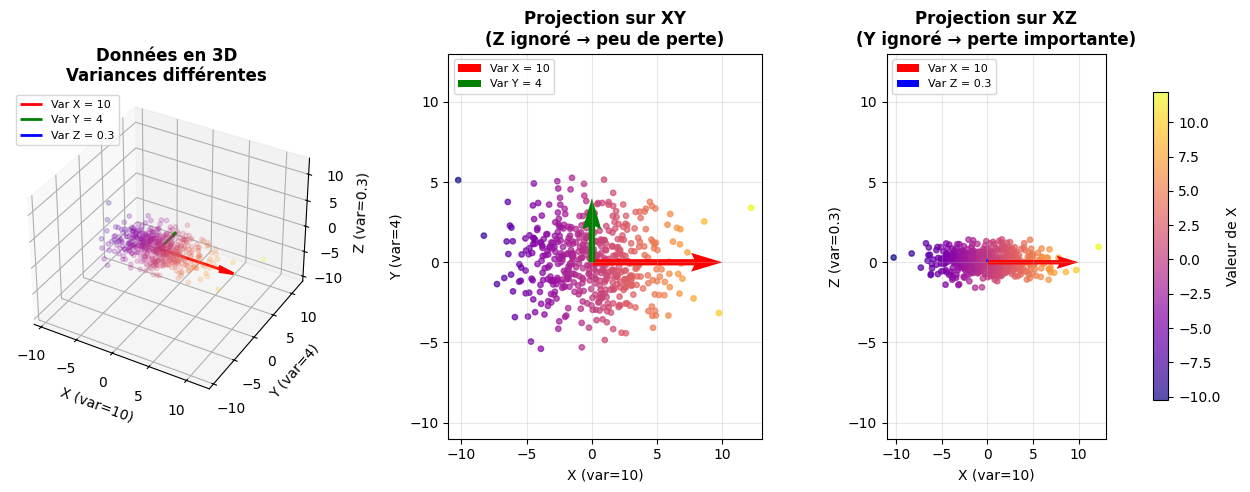

VARIANCE ET RÉDUCTION DE DIMENSION

------------------------------------------------------------
VARIANCES DES DONNÉES
------------------------------------------------------------
Variance sur X :  10.0  (FORTE)   → beaucoup d'information
Variance sur Y :   4.0  (MOYENNE) → information modérée
Variance sur Z :   0.3  (FAIBLE)  → peu d'information

------------------------------------------------------------
VARIANCES CALCULÉES SUR LES DONNÉES
------------------------------------------------------------
Variance réelle X : 9.61
Variance réelle Y : 3.82
Variance réelle Z : 0.31

------------------------------------------------------------
ANALYSE DES PROJECTIONS
------------------------------------------------------------

PROJECTION XY (ignorer Z) :
  • Z a une variance faible (0.3)
  • Ignorer Z = perdre peu d'information
  • La structure des données est PRÉSERVÉE
  • C'est ce que ferait PCA : garder X et Y

PROJECTION XZ (ignorer Y) :
  • Y a une variance moyenne (4)
  • Ignorer Y = p

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Paramètres
n_points = 500
np.random.seed(42)  # Pour reproductibilité

# Génération des points avec variances différentes selon les axes
# Variance forte sur X, moyenne sur Y, faible sur Z
var_x = 10   # Variance forte
var_y = 4    # Variance moyenne
var_z = 0.3  # Variance faible (peu d'information)

x = np.random.randn(n_points) * np.sqrt(var_x)
y = np.random.randn(n_points) * np.sqrt(var_y)
z = np.random.randn(n_points) * np.sqrt(var_z)

# Couleur basée sur la position en X pour visualiser la structure
colors = x

# Création de la figure avec deux sous-graphiques
fig = plt.figure(figsize=(14, 5))

# Sous-graphique 1 : Points en 3D
ax1 = fig.add_subplot(131, projection='3d')

# Tracé des points avec plus de transparence
scatter1 = ax1.scatter(x, y, z, c=colors, cmap='plasma', s=10, alpha=0.2, depthshade=False)

# Vecteurs de variance en 3D avec plot3D (plus visible que quiver)
# Vecteur variance selon X (rouge)
ax1.quiver(0, 0, 0,      # Point de départ (x, y, z)
          var_x, 0, 0,   # Direction du vecteur (dx, dy, dz)
          color='red', 
          arrow_length_ratio=0.2,  # Taille de la pointe de flèche
          linewidth=2,
          label=f'Var X = {var_x}')

# Vecteur variance selon Y (vert)
ax1.quiver(0, 0, 0, 
          0, var_y, 0, 
          color='green', 
          arrow_length_ratio=0.2, 
          linewidth=2,
          label=f'Var Y = {var_y}')


# Vecteur variance selon Z (bleu) - même petit, on le montre
ax1.quiver(0, 0, 0, 
          0, 0, var_z, 
          color='blue', 
          arrow_length_ratio=0.2, 
          linewidth=2,
          label=f'Var Z = {var_z}')

ax1.set_xlabel('X (var=10)', fontsize=10)
ax1.set_ylabel('Y (var=4)', fontsize=10)
ax1.set_zlabel('Z (var=0.3)', fontsize=10)
ax1.set_title('Données en 3D\nVariances différentes', fontsize=12, fontweight='bold')
ax1.set_xlim(-11, 13)
ax1.set_ylim(-11, 13)
ax1.set_zlim(-11, 13)
ax1.view_init(elev=35, azim=-60) # positionnement de la caméra (pour mieux voir les vecteurs variances)
ax1.legend(loc='upper left', fontsize=8)

# Sous-graphique 2 : Projection sur le plan XY
ax2 = fig.add_subplot(132)
scatter2 = ax2.scatter(x, y, c=colors, cmap='plasma', s=15, alpha=0.7)

# Vecteurs de variance en 2D (XY)
ax2.quiver(0, 0, var_x, 0, angles='xy', scale_units='xy', scale=1, color='red', width=0.02, label=f'Var X = {var_x}')
ax2.quiver(0, 0, 0, var_y, angles='xy', scale_units='xy', scale=1, color='green', width=0.02, label=f'Var Y = {var_y}')

ax2.set_xlabel('X (var=10)', fontsize=10)
ax2.set_ylabel('Y (var=4)', fontsize=10)
ax2.set_title('Projection sur XY\n(Z ignoré → peu de perte)', fontsize=12, fontweight='bold')
ax2.set_xlim(-11, 13)
ax2.set_ylim(-11, 13)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper left', fontsize=8)

# Sous-graphique 3 : Projection sur le plan XZ (mauvaise projection)
ax3 = fig.add_subplot(133)
scatter3 = ax3.scatter(x, z, c=colors, cmap='plasma', s=15, alpha=0.7)

# Vecteurs de variance en 2D (XZ)
ax3.quiver(0, 0, var_x, 0, angles='xy', scale_units='xy', scale=1, color='red', width=0.02, label=f'Var X = {var_x}')
ax3.quiver(0, 0, 0, var_z, angles='xy', scale_units='xy', scale=1, color='blue', width=0.02, label=f'Var Z = {var_z}')

ax3.set_xlabel('X (var=10)', fontsize=10)
ax3.set_ylabel('Z (var=0.3)', fontsize=10)
ax3.set_title('Projection sur XZ\n(Y ignoré → perte importante)', fontsize=12, fontweight='bold')
ax3.set_xlim(-11, 13)
ax3.set_ylim(-11, 13)
ax3.grid(True, alpha=0.3)
ax3.legend(loc='upper left', fontsize=8)

# Barre de couleur positionnée à droite
plt.subplots_adjust(left=0.03, right=0.88, wspace=0.4)
cbar = fig.colorbar(scatter2, ax=ax3, shrink=0.8, pad=0.15)
cbar.set_label('Valeur de X', fontsize=10)

plt.show()

# Affichage des informations dans la console
print("=" * 60)
print("VARIANCE ET RÉDUCTION DE DIMENSION")
print("=" * 60)

print("\n" + "-" * 60)
print("VARIANCES DES DONNÉES")
print("-" * 60)
print(f"Variance sur X : {var_x:5.1f}  (FORTE)   → beaucoup d'information")
print(f"Variance sur Y : {var_y:5.1f}  (MOYENNE) → information modérée")
print(f"Variance sur Z : {var_z:5.1f}  (FAIBLE)  → peu d'information")

print("\n" + "-" * 60)
print("VARIANCES CALCULÉES SUR LES DONNÉES")
print("-" * 60)
print(f"Variance réelle X : {np.var(x):.2f}")
print(f"Variance réelle Y : {np.var(y):.2f}")
print(f"Variance réelle Z : {np.var(z):.2f}")

print("\n" + "-" * 60)
print("ANALYSE DES PROJECTIONS")
print("-" * 60)
print("")
print("PROJECTION XY (ignorer Z) :")
print("  • Z a une variance faible (0.3)")
print("  • Ignorer Z = perdre peu d'information")
print("  • La structure des données est PRÉSERVÉE")
print("  • C'est ce que ferait PCA : garder X et Y")
print("")
print("PROJECTION XZ (ignorer Y) :")
print("  • Y a une variance moyenne (4)")
print("  • Ignorer Y = perdre de l'information")
print("  • Les points s'écrasent sur une bande étroite en Z")
print("  • La structure est MOINS BIEN préservée")

print("\n" + "-" * 60)
print("VARIANCE EXPLIQUÉE")
print("-" * 60)
total_var = var_x + var_y + var_z
print(f"Variance totale : {total_var:.1f}")
print(f"")
print(f"Si on garde X et Y :")
print(f"  Variance conservée : {var_x + var_y:.1f} / {total_var:.1f} = {100*(var_x + var_y)/total_var:.1f}%")
print(f"")
print(f"Si on garde X et Z :")
print(f"  Variance conservée : {var_x + var_z:.1f} / {total_var:.1f} = {100*(var_x + var_z)/total_var:.1f}%")

L’exemple que nous venons de voir est très théorique : les données sont dispersées selon un alignement avec les axes (x, y et z). Dans la réalité, les données peuvent avoir une structure où la variance change effectivement selon certaines directions – c’est d’ailleurs ce qui nous intéresse – mais ces directions ne sont pas triviales. 

#### Exercice 14 : projection, transformation et changement de base

Nous allons donc faire un exercice un peu plus aligné avec ce qu’il peut se passer dans la réalité, où les données qui ne sont pas orientées dans la direction des axes (x, y, z), et où l’on verra donc l’intérêt de changer de base. Sans être à strictement parler une analyse en composantes principales, cet exercice nous permettra d’en comprendre la logique. Le but est de générer les figures suivantes :

![Nuages de point dans des directions quelconques](./images/NuageDirectionQuelconque.png)

Nous allons procéder en plusieurs étapes. Pour générer un nuage de points orienté dans des directions diverses, nous allons comme dans l’exercice précédent générer un nuage avec des variances dans les différents axes, puis nous allons appliquer des transformations (rotations) qui vont modifier les orientations.

* Étape 1 : générer un nuage de point avec différentes variances selon les 3 dimensions, comme dans l’exemple précédent
* Étape 2 : créer une matrice de rotation 3D. Vous savez faire des rotations en 2D. Pour créer cette matrice nous allons dans un premier temps réaliser des rotations autour de chacun des axes. Nous allons donc créer une matrice $Rx$ pour une rotation autour de l’axe $x$ d’un angle γ, puis $Ry$ avec un angle β et $Rz$ avec un angle α. Nous allons ensuite composer ces rotations pour créer une matrice de rotation $R$. Créez donc une fonction `matrice_rotation_3d(alpha, beta, gamma)` qui retournera cette matrice $R$.
  Pour vous aider, voici la matrice de rotation autour de l’axe $x$ :
  $$
  \begin{bmatrix}  1 & 0 & 0 \\
                  0 & \cos \gamma & -\sin \gamma \\
                  0 & \sin \gamma & \cos \gamma\
  \end{bmatrix}
  $$
  À vous de trouver les matrices pour les autres axes.
  *(Vous devriez au moins comprendre intuitivement qu’il y a un axe qu’on laisse inchangé, et qu’on fait la rotation dans le plan des deux autres axes)
* Étape 3 : appliquer la rotation au nuage de point, et extraire les coordonnées des points selon les 3 axes. La figure ci-dessus a été obtenue avec des rotations de 40° autour de $x$, 25° autour de $y$ et 35° autour de $z$, mais vous pouvez (et je vous encourage à la fin de l’exercice de tester plusieurs valeurs pour voir les effets). Nous avons notre nouveau nuage de point, qui a ses propres directions (alignées sur la base qui correspond à la rotation que nous venons d’effectuer). Imaginons que ce sont les poins que nous observons, **tels qu’ils apparaissent dans le repère (x, y, z)**.
* Étape 4 : nous pouvons aussi, pour ce nuage de points dans le repère (x, y, z), nous pouvons créer les vecteurs correspondant au variances dans les différentes directions. Si vous avez bien suivi, chaque colonne de notre matrice de rotation correspond à l’une de ces directions. Pour chacune de ces direction, le vecteur variance coorespondant a juste pour longueur la variance correspondante.
* Étape 5 : figure 1, visualisation 3D : affichez le nuage de points dans (x, y z) et les vecteurs variances dans chacune des directions (que vous venez de calculer)
* Étape 6 : figure 2, projection 2D sans changement de base : affichez la projection du nuage sur le plan (x, y) et les vecteurs variances en éliminant la variance z, tout simplement (comme précédemment). Qu’observez-vous pour les variances ?
* Étape 7 : figure 3, projection 2D avec changement de base : on va afficher le nuage de points mais cette fois dans la base transformée. On ne va plus appeler les axes $x$ et $y$, mais « composante principale 1 » et « composante principale 2 », qui forment le repère qu’on appelera « CP », car elles correspondront aux composantes liées aux variances qui caractérisent notre nuage de point. Nous retenons seulement les deux directions avec les deux plus fortes variances. Calculez donc les coordonnées des points dans le repère CP (en faisant donc la rotation inverse : rappelez-vous une propriété intéressante des matrices orthogonales), et afficher les vecteurs variances correspondants.
* Quelles sont vos observations ? Comprenez vous l’intérêt de prendre en compte le changement de base ?
* Pour guider votre réflexion, votre code devra afficher :
    * La matrice de rotation $R$
    * Les variances  dans (x, y, z) et les variances dans CP (pour les trois directions)
    * Vérifier que le calcul des coordonnées des points dans CP (par rotation inverse) correspondent aux vecteurss (p1, p2, p3) qu’on a utilisé au départ pour créer notre nuage de point

In [15]:
# Exercice 14 : Votre code !

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Paramètres
n_points = 500
np.random.seed(42)

# -------------------------------------------------------------------------------------------------------------
# ÉTAPE 1 : On commence par générer un nuage de points aligné sur les axes (comme dans l’exemple)
# -------------------------------------------------------------------------------------------------------------
# VOTRE CODE

# -----------------------------------------------------------------------------
# ÉTAPE 2 : Créer une matrice de rotation pour orienter le nuage
# -----------------------------------------------------------------------------
# Pour créer une rotation 3D quelconque on va composer 3 rotations autour de chacun des axes

def matrice_rotation_3d(alpha, beta, gamma):
    """
    Crée une matrice de rotation 3D à partir des angles d'Euler.
    alpha : rotation autour de l'axe Z
    beta  : rotation autour de l'axe Y
    gamma : rotation autour de l'axe X
    """
    # Rotation autour de Z
    # VOTRE CODE

    
    # Rotation autour de Y
    # VOTRE CODE

    
    # Rotation autour de X
    # VOTRE CODE
    
    # Composition des rotations
    return # VOTRE CODE

# Angles de rotation (en radians)
alpha = np.radians(35)   # Rotation autour de Z
beta = np.radians(25)    # Rotation autour de Y
gamma = np.radians(40)   # Rotation autour de X

# Matrice de rotation
R = matrice_rotation_3d(alpha, beta, gamma)

# -----------------------------------------------------------------------------
# ÉTAPE 3 : Appliquer la rotation au nuage de points
# -----------------------------------------------------------------------------
# Chaque point est transformé par la matrice de rotation
points_tournes = # VOTRE CODE

# Extraire les coordonnées
x = points_tournes[:, 0]
y = points_tournes[:, 1]
z = points_tournes[:, 2]

# -----------------------------------------------------------------------------
# ÉTAPE 4 : Calculer les directions principales (vecteurs propres)
# -----------------------------------------------------------------------------
# Les directions principales sont les colonnes de R (car on a appliqué R aux données)
# En pratique, on les retrouverait avec la PCA

# Direction de variance maximale (var_1 = 10)
dir_1 = R[:, 0] * var_1

# Direction de variance moyenne (var_2 = 4)
dir_2 = R[:, 1] * var_2

# Direction de variance minimale (var_3 = 0.3)
dir_3 = R[:, 2] * var_3

# -----------------------------------------------------------------------------
# VISUALISATION
# -----------------------------------------------------------------------------
fig = plt.figure(figsize=(14, 5))

# ----------------------------------------------------------------
# Figure 1 : Nuage de points tourné en 3D
# ----------------------------------------------------------------

ax1 = fig.add_subplot(131, projection='3d')

# Points avec transparence
colors = p1  # Couleur basée sur la position dans la direction principale
scatter1 = ax1.scatter(x, y, z, c=colors, cmap='plasma', s=10, alpha=0.2, depthshade=False)

# Vecteurs des directions principales (longueur = variance)
# VOTRE CODE

ax1.set_xlabel('X', fontsize=10)
ax1.set_ylabel('Y', fontsize=10)
ax1.set_zlabel('Z', fontsize=10)
ax1.set_title('Nuage tourné en 3D\nDirections principales ≠ axes', fontsize=12, fontweight='bold')
ax1.set_xlim(-11, 13)
ax1.set_ylim(-11, 13)
ax1.set_zlim(-11, 13)
ax1.view_init(elev=20, azim=45)
ax1.legend(loc='upper left', fontsize=8)

# --------------------------------------------------------------------------------
# Figure 2 : Projection sur XY (mauvaise sans changement de base)
# --------------------------------------------------------------------------------

ax2 = fig.add_subplot(132)
scatter2 = ax2.scatter(x, y, c=colors, cmap='plasma', s=15, alpha=0.7)

# Projection des vecteurs sur XY
# VOTRE CODE

ax2.set_xlabel('X', fontsize=10)
ax2.set_ylabel('Y', fontsize=10)
ax2.set_title('Projection sur XY\n(mélange des composantes)', fontsize=12, fontweight='bold')
ax2.set_xlim(-11, 13)
ax2.set_ylim(-11, 13)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper left', fontsize=8)

# --------------------------------------------------------------------------------
# Figure 3 : Vue dans le repère des composantes principales
# --------------------------------------------------------------------------------

ax3 = fig.add_subplot(133)

# CHANGEMENT DE BASE : projection dans le repère des CP
# On applique la transformation inverse : R^T @ points_tournes^T
# (R est orthogonale donc R^(-1) = R^T)
points_dans_repere_CP = # VOTRE CODE

# Extraction des coordonnées dans le repère des CP
cp1 = points_dans_repere_CP[:, 0]
cp2 = points_dans_repere_CP[:, 1]
cp3 = points_dans_repere_CP[:, 2]

# Affichage des deux premières composantes principales
scatter3 = ax3.scatter(cp1, cp2, c=colors, cmap='plasma', s=15, alpha=0.7)

# Vecteurs alignés sur les axes
# VOTRE CODE

ax3.set_xlabel('Composante Principale 1', fontsize=10)
ax3.set_ylabel('Composante Principale 2', fontsize=10)
ax3.set_title('Après changement de base\n(repère des CP)', fontsize=12, fontweight='bold')
ax3.set_xlim(-11, 13)
ax3.set_ylim(-11, 13)
ax3.grid(True, alpha=0.3)
ax3.legend(loc='upper left', fontsize=8)

# Barre de couleur
plt.subplots_adjust(left=0.03, right=0.88, wspace=0.4)
cbar = fig.colorbar(scatter3, ax=ax3, shrink=0.8, pad=0.15)
cbar.set_label('Position sur PC1', fontsize=10)

plt.show()

# =============================================================================
# AFFICHAGE DES INFORMATIONS
# =============================================================================
print("=" * 70)
print("EXERCICE : NUAGE DE POINTS AVEC DIRECTIONS QUELCONQUES")
print("=" * 70)

print("\n" + "-" * 70)
print("PARAMÈTRES DE GÉNÉRATION")
print("-" * 70)
print(f"Nombre de points : {n_points}")
print(f"\nVariances dans le repère des composantes principales :")
print(f"  • Variance CP1 : {var_1:5.1f}  (direction principale)")
print(f"  • Variance CP2 : {var_2:5.1f}  (direction secondaire)")
print(f"  • Variance CP3 : {var_3:5.1f}  (direction de moindre variance)")

print(f"\nAngles de rotation appliqués :")
print(f"  • Alpha (autour de Z) : {np.degrees(alpha):.0f}°")
print(f"  • Beta  (autour de Y) : {np.degrees(beta):.0f}°")
print(f"  • Gamma (autour de X) : {np.degrees(gamma):.0f}°")

print("\n" + "-" * 70)
print("MATRICE DE ROTATION")
print("-" * 70)
print("Les colonnes de cette matrice sont les directions des composantes principales :")
# VOTRE CODE

print("\n" + "-" * 70)
print("POURQUOI LE CHANGEMENT DE BASE EST NÉCESSAIRE")
print("-" * 70)
print("""
# VOTRE CODE
""".format(var_1 + var_2))

print("-" * 70)
print("VARIANCE DANS LE REPÈRE ORIGINAL vs REPÈRE DES CP")
print("-" * 70)
print(f"\nVariance dans le repère (x, y, z) :")
# VOTRE CODE

print(f"\nVariance dans le repère des CP (après changement de base) :")
# VOTRE CODE

print("\n" + "-" * 70)
print("VÉRIFICATION : TRANSFORMATION INVERSE")
print("-" * 70)
print("On a calculé les coordonnées dans le repère des CP par :")
print("  points_dans_repere_CP = R^T @ points_tournes")
print("")
print("Vérification que cp1, cp2, cp3 correspondent bien à p1, p2, p3 (différence nulle):")

print("")
print("Les différences sont quasi-nulles : le changement de base")
print("a bien retrouvé les coordonnées initiales p1, p2, p3 !")

SyntaxError: invalid syntax (1100439865.py, line 54)

Bien sûr cet exercice est toujours un peu artificiel (on crée un nuage de point, on le transforme de manière connue, et on fait la transformée inverse pour retomber sur le nuage dont on est parti) mais il montre bien étape par étape la logique qu’on va mettre en œuvre dans l’analyse en composante principale.

Dans l’exercice, nous savions exactement quelle transformation nous avions appliquée au nuage de points pour lui donner les directions que nous recherchions, donc nous savions exactement quelle matrice de transformation nous permettait d’effectuer le changement de base. Avec des données réelles, il n‘y a personne pour nous indiquer quelles sont les directions qui maximisent les variances, il nous faut donc une méthode pour trouver ces directions, et donc la matrice de transformation qui convient.

C’est l’objet de la prochaine section, celle où l’on va évoquer la dernière notion d’algèbre linéaire que nous allons découvrir : les valeurs propres.

## ACP : Valeurs propres et diagonalisation

### Matrice symétrique et ellipsoïde d’inertie

Rappel de notre problème :

* nous avons des donnnées dans plusieurs dimensions, et nous souhaitons conserver seulement les dimensions qui apportent de l’information (avec le maximum de variance) et éliminer les dimensions qui n’apportent que peu d’information (avec le moins de variance)
* ces données, qu’on peut se représenter comme un nuage de points, sont organisées selon des directions privilégiées, les directions où la variance est maximale
* il nous faut donc trouver un repère orienté sur ces directions où la variance est maximale, donc trouver la matrice de transformation qui permet de calculer les coordonnées dans cet espace de variance maximale
* une matrice que nous avons sous la main est la matrice de variance covariance, qui, outre le fait d’être une matrice carrée, est symétrique.

Penchons donc nous plus en détail sur les matrices symétriques.

Nous avons vu que tout matrice est en fait une transformation linéaire. Une matrice carré transforme un vecteur de dimension $n$ en un autre vecteur de dimension $n$, et comme une matrice carré est inversible, son inverse permet la transformation inverse. C’est comme ça (ce que nous venons de voir ci-dessus) qu’on peut utiliser une matrice pour calculer les coordonnées d’un vecteur dans différents espaces.

Nous avons vu plus haut différents types de transformations à l’aide d’une matrice carrée (homothétie, cisaillement, rotation…). Voyons donc quel type de transformation une matrice symétrique permet de réaliser.

#### Exercice 15 : transformation par une matrice symétrique

* Nous allons expérimenter avec une matrice symétrique simple, dimension (2,2), par exemple :
$$
A = \begin{bmatrix}5 & 0,5\\
            0,5 & 3\end{bmatrix}
$$
* Étape 1 : Pour voir la déformation, il faut partir d’une figure dont nous pourrons apprécier la transformation. Pour cette exercice, le mieux est de partir d’un cercle (vous comprendrez vite pourquoi). Créez donc 10 vecteurs dont les extrémités sont situés sur un cercle centré sur l’origine et de rayon 1 (le cercle trigonométrique). Indice : pour un angle donnée, la composante x du vecteur est le cosinus de l’angle, et la composante y le sinus.
*  Étape 2 : pour tout ces vecteurs, calculez la transformation par la matrice $A$
*  Étape 3 : pour vous, nous générons ce que nous appelons « valeurs propres » et « vecteurs propres ». Votre mission dans cet exercice sera de comprendre à quoi cela correspond
*  Étape 4 : pour faciliter la visualisation, générer un cercle de rayon 1 et centré sur 0, et la transformation de ce cercle par la matrice A
*  Étape 5 : visualisation de tout ces objets :
    *  tracez le cercle en pointillés bleus,
    *  le cercle transformé en pointillés rouges,
    *  des flèches bleues pour les vecteurs sur le cercle,
    *  des flèches rouges pour les vecteurs sur le cercle tranformé
    *  pour faciliter la lecture de la figure et suivre les transformation, vous pouvez aussi tracer des lignes pointillées grises entre chaque vecteur sur le cercle d’origine, et le vecteur transformé correspondant
* Pour vous, nous traçons également en vert les vecteurs propres « scalés » par les valeurs propres que nous avons calculé précédemment

In [16]:
# Exercice 15 : votre code !

import numpy as np
import matplotlib.pyplot as plt

# Matrice symétrique
A = np.array([[5, 0.5],
              [0.5, 3]])

# -----------------------------------------------------------------------------
# ÉTAPE 1 : Générer les vecteurs sur le cercle unité
# -----------------------------------------------------------------------------
n_vecteurs = 10
angles = np.linspace(0, 2 * np.pi, n_vecteurs, endpoint=False)

# Vecteurs unitaires (extrémités sur le cercle de rayon 1)
vecteurs_cercle = np.array([[ # VOTRE CODE] for theta in angles])

# -----------------------------------------------------------------------------
# ÉTAPE 2 : Appliquer la transformation matricielle
# -----------------------------------------------------------------------------
# Chaque vecteur v devient A @ v
vecteurs_ellipse = # VOTRE CODE

# -----------------------------------------------------------------------------
# ÉTAPE 3 : Calculer les valeurs et vecteurs propres
# -----------------------------------------------------------------------------
valeurs_propres, vecteurs_propres = np.linalg.eig(A)

# Trier par valeur propre décroissante
idx = np.argsort(valeurs_propres)[::-1]
valeurs_propres = valeurs_propres[idx]
vecteurs_propres = vecteurs_propres[:, idx]

# -----------------------------------------------------------------------------
# ÉTAPE 4 : Générer le cercle et l'ellipse pour le tracé
# -----------------------------------------------------------------------------
theta_contour = np.linspace(0, 2 * np.pi, 100)

# Cercle unité
cercle_x = # VOTRE CODE
cercle_y =# VOTRE CODE

# Ellipse = transformation du cercle par A
ellipse_points = np.array([# VOTRE CODE @ np.array(# VOTRE CODE) for t in theta_contour])
ellipse_x = ellipse_points[:, 0]
ellipse_y = ellipse_points[:, 1]

# -----------------------------------------------------------------------------
# VISUALISATION
# -----------------------------------------------------------------------------
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Cercle unité en pointillés bleus
ax.plot(cercle_x, cercle_y, 'b--', linewidth=2, label='Cercle unité')

# Ellipse en pointillés rouges
ax.plot(ellipse_x, ellipse_y, 'r--', linewidth=2, label='Ellipse (image par A)')

# Vecteurs originaux (sur le cercle)
for i, v in enumerate(vecteurs_cercle):
   # VOTRE CODE

# Vecteurs transformés (sur l'ellipse)
for i, v in enumerate(vecteurs_ellipse):
   # VOTRE CODE

# Lignes de correspondance entre cercle et ellipse
for i in range(len(vecteurs_cercle)):
    v_cercle = vecteurs_cercle[i]
    v_ellipse = vecteurs_ellipse[i]
    # VOTRE CODE

# Vecteurs propres (axes de l'ellipse)
for i in range(2):
    vp = vecteurs_propres[:, i]
    val = valeurs_propres[i]
    # Vecteur propre mis à l'échelle par la valeur propre
    ax.quiver(0, 0, vp[0] * val, vp[1] * val, angles='xy', scale_units='xy', scale=1,
              color='green', width=0.008, linewidth=2,
              label=f'VP{i+1}: λ={val:.1f}' if i == 0 else f'VP{i+1}: λ={val:.1f}')

# Configuration
ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_title('Ellipsoïde d\'inertie : transformation du cercle en ellipse\n' +
             'Matrice A = [[5, 0.5], [0.5, 3]]', 
             fontsize=13, fontweight='bold')
ax.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()



SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (1064352974.py, line 23)

Que constatez vous ?
* À quoi correspond la transformation par une matrice symétrique ?
* À quoi, selon vous, correspondent les vecteurs propres et les valeurs propres ?
* Pourquoi parle-t-on d’éllipsoïde d’inertie ?

Essayez de répondre par vous-même à ces questions avant de lire la suite.

Revenons à notre transformation : nous constatons que nous transformons un cercle en ellipse. Cela signifie que nous appliquons deux « dilatations » différentes selon deux directions orthogonales.

Si nous reprenons notre matrice symétrique de départ $A$ la transformation d’un vecteur $v = [v_x, v_y]^T$ en un vecteur $u =[u_x, u_v]^T$ s’écrit :
$$
u_x = 5·v_x + 0,5·v_y\\
u_y = 0,5·v_x + 3·v_y
$$
qui, si elle transforme en ellipse, devrait être équivalente à :
$$
u_x = \lambda_1·x + 0·y
u_y = 0·x + \lambda_2·y
$$
à condition de faire correspondre les axes x et y aux axes de l’ellipse.

Dans ce cas, la matrice de transformation en ellipse est : 
$$
E = \begin{bmatrix}\lambda_1 & 0 \\
                0 & \lambda_2
\end{bmatrix}
$$ 

Qui est une matrice diagonale : comme $A$ et $E$ réalisent une transformation équivalente (mais dans une base différente), on dit que $E$ est la diagonalisation de la matrice $A$. $\lambda_1$ et $\lambda_2$ sont les **valeurs propres** de la matrice. Ici la matrice diagonalisée est :
$$
\begin{bmatrix}\lambda_1 & 0 \\
                0 & \lambda_2
\end{bmatrix} =
\begin{bmatrix}5,11803399 & 0 \\
                0 & 2,88196601
\end{bmatrix}
$$

Propriété : 
* les valeurs propres ne peuvent pas être négatives (cela vient de ce que la matrice des covariances est semi-définie positive)
* les deux matrices (variance/covariance et diagonalisée) ont la même trace !
$$ 
\text{Trace }A = \text{Trace } \begin{bmatrix}5 & 0,5 \\
                0,5 & 3
\end{bmatrix} = 5 + 3 = 8
 \\
\text{Trace }E = \text{Trace } \begin{bmatrix}5,11803399 & 0 \\
                0 & 2,88196601
\end{bmatrix} = 5,11803399 + 2,88196601 = 8
$$

La matrice diagonalisée conserve la variance, mais annule les termes de covariance.

Si vous avez été attentif-ve-s, vous avez bien noté que tout ceci nécessite de se placer dans la bonne base orthonormée, qui correspond aux axes de l’ellipse. Cette fois, ce sont les **vecteurs propres** qui vont constituer cette base. Techniquement ils forment les petits et grands axes de l’ellipse, on obtient des vecteurs unités en les divisant par les valeurs propres (normalisation). 
Les vecteurs propres normalisés permettent de créer la matrice qui permet de changer de base : chaque colonne de la matrice sera un vecteur propre normalisé. Ici si $vp_1 = [0.9732, 0.2298]^T$ et $vp_2 = [-0.2298, 0.9732]$ alors la matrice de changement de base est :
$$
P = \begin{bmatrix}0.9732 & -0.2298 \\
                    0.2298 & 0.9732   
\end{bmatrix}
$$

Et vous aurez reconnu la forme d’une matrice de rotation. 
**Note importante** : cette rotation se fait autour de l’origine, il est donc très important que les données soient centrées ! 

#### Exercice 16 : récapitulation

Pour récapituler, faite un petit script :

* Affichez la matrice A, quelle sont ses spécificités ?
* Affichez les valeurs propres. À quoi correspondent-elles ?
* Affichez les vecteurs propres. À quoi correspondent-ils ?
* Affichez la matrice de changement de base P
* Affichez la matrice diagonalisée D
* Retrouver A à partir de P et de D. Indice : il faut exprimer D dans le repère P, puis passer la matrice obtenue dans le repère d’origine avec la transformation inverse (attention à l’ordre des opérations, et n’oubliez pas que nous pouvons exploiter une relation particulière entre inverse et transposée dans notre cas)

In [3]:
# Exercice 16 : votre code
print("=" * 60)
print("DIAGONALISATION ET ELLIPSOÏDE D'INERTIE")
print("=" * 60)

print("\n" + "-" * 60)
print("MATRICE A")
print("-" * 60)
# VOTRE CODE

print("\n" + "-" * 60)
print("VALEURS PROPRES")
print("-" * 60)
# VOTRE CODE

print("\n" + "-" * 60)
print("VECTEURS PROPRES (normalisés)")
print("-" * 60)
# VOTRE CODE

print("\n" + "-" * 60)
print("MATRICE DE PASSAGE P (colonnes = vecteurs propres)")
print("-" * 60)
# VOTRE CODE

print("\n" + "-" * 60)
print("MATRICE DIAGONALE D")
# VOTRE CODE

print("\n" + "-" * 60)
print("VÉRIFICATION : A = P @ D @ P^T")
print("-" * 60)
# VOTRE CODE


DIAGONALISATION ET ELLIPSOÏDE D'INERTIE

------------------------------------------------------------
MATRICE A
------------------------------------------------------------
[[5.  0.5]
 [0.5 3. ]]

Cette matrice est symétrique (A = A^T)
→ Elle est diagonalisable dans une base orthonormée

------------------------------------------------------------
VALEURS PROPRES
------------------------------------------------------------
λ1 = 5.1180
λ2 = 2.8820

Les valeurs propres sont les longueurs des demi-axes de l'ellipse

------------------------------------------------------------
VECTEURS PROPRES (normalisés)
------------------------------------------------------------
v1 = [0.9732, 0.2298]
v2 = [-0.2298, 0.9732]

Les vecteurs propres sont les directions des axes de l'ellipse

------------------------------------------------------------
MATRICE DE PASSAGE P (colonnes = vecteurs propres)
------------------------------------------------------------
[[ 0.97324899 -0.22975292]
 [ 0.22975292  0.97

**Bien sûr tout ce que nous venons de voir pour 3 dimensions est parfaitement généralisable à $n$ dimensions (c’est tout l’intérêt).**

Bravo ! vous avez acquis toutes les bases mathématiques qui vous permettent d’implémenter votre propre algorthme d’analyse en composante principale.

## L’analyse en composante principale, ou ACP (ou PCA en anglais)

### Pourquoi réduire les dimensions ?

#### Beaucoup de dimension = problèmes

En data science, on travaille souvent avec des données de **haute dimension**. Par exemple :
- Images : millions de pixels
- Textes : milliers de mots
- Données biologiques : milliers de gènes

**Cela pose de nombreux problèmes** :
* difficile à visualiser (au-delà de 3D)
* coûteux en calcul. À noter réduire les dimensions d’un problème ne va généralement pas *faciliter* l’apprentissage par un modèle de machine learning, mais va plutôt *l’accélérer* (moins de calculs = temps gagné = moins cher, mais pas forcément de meilleures performances)
* "fléau (*curse*) de la dimensionalité" : plus il y a de dimensions, et plus chaque observation va devenir très spécifique (combinaison de valeurs singulières de chaque dimension), les données seront éparses, difficile de trouver des traits communs, donc de généraliser. Pour cela, il faut arriver à « gommer » des petites différences (introduire un biais), « lisser » les données en perdant de l’information (mais pas trop) donc en supprimant les dimensions qui apportent plus du bruit que de l’information utile.
* difficile d’interpréter des données quand il y a plus de dimensions que ce que l’on peut se représenter de manière intelligible (cf. point 1)

#### Objectif de l'ACP

* **Réduire la dimensionnalité** $n \rightarrow k$ (avec $k < n$) tout en **conservant le maximum d'information** (variance).

* Principe : Trouver les directions où les données **varient le plus**.

#### Applications

* facilite la **visualisation** de données à hautes dimensions
* **compression** de données
* **débruitage** (on ne garde que l’info pertinente)
* **preprocessing** pour le Machine Learning pour accélérer l’apprentissage ou le rendre moins coûteux en ressources (ça fait partie de l’arsenal d’exploration des données et de prétraitement, comme K-means)
* analyse d'images (on va farie un TP sur la reconnaissance de visages)
* analyse de données génomiques (isoler les séquences significatives)

### Algorithme de l’ACP

#### Rappel des fondements mathématiques (au cas où ce ne serait pas bien rentré)

Problème : trouver une direction $u_1$ (vecteur unitaire) telle que la **variance** des données projetées sur $u_1$ soit **maximale** :

$$\max_{u_1} \text{Var}(\text{projection sur } u_1) = \max_{u_1} u_1^T \Sigma u_1$$

sous la contrainte : $\|u_1\| = 1$

Solution : $u_1$ est le **vecteur propre** associé à la **plus grande valeur propre** de $\Sigma$.

La variance capturée est $\lambda_1$ (la plus grande valeur propre), ce sera la première **composante principale**.

Ensuite :

* **2ème composante principale** $u_2$ : direction orthogonale à $u_1$ de variance maximale
* $u_2$ = vecteur propre de la 2ème plus grande valeur propre $\lambda_2$
* et ainsi de suite...

Pour réduire les dimensions, on va juste sélectionner les $k$ premières composantes principales. Exemple : pour réduire un espace à 3 dimensions, on va retenir seulement les $k=2$ premières composantes principales.

Les $k$ premières composantes principales :
* correspondent aux $k$ vecteurs propres des $k$ plus grandes valeurs propres
* forment une **base orthonormée optimale** pour représenter les données

#### Exercice 17 : Implémentation

Maintenant que nous connaissons les principes mathématiques en jeu, l’implémentation de l’algorithme est pratiquement évidente. Même principe que pour le k-means : je vous propose du code à trou, à vous de le compléter !

Vous allez créer une classe `PCA()` qui prend en argument le nombre `k`de composantes principales que vous voulez conserver, avec :
* une méthode `.fit()` qui :
    1. centre le jeu de données
    2. calcule la matrice de covariance
    3. calcule les valeurs propres et les vecteurs propres
    4. ordonne les valeurs propres par ordre décroissant (attention, les vecteurs aussi)
    5. sélectionner les `k` premières composantes
* une méthodee `.transform()` qui réalise la projection dans l’espace des vecteurs propres et renvoie les données projetées
* pour le reste sont déjà écrites :
    * l’initialisation de la classe (qui déclare les variables qui seront utilisées)
    * une méthode `.fit_transform()` (standard dans beaucoup de classes de machine learning) qui enchaîne les deux méthodes précédentes
    * une méthode `.inverse_transform()` qui recrée les données originales à partir des données projetées dans l’espace des vecteurs propres
    * des méthodes `.explained_variance()` et `.explained_variance_ratio()` qui renvoie la part de variance expliquée par chaque composante

À vous de jouer pour compléter ce code !

In [25]:
# Exercice 16 : compléter le code 

class PCA:
    def __init__(self, k_components):
        """
        Analyse en Composantes Principales
        
        Paramètres :
        -----------
        k_components : int
            Nombre de composantes principales à garder
        """
        self.k_components = k_components
        self.components = None
        self.mean = None
        self.eigenvalues = None
        
    def fit(self, X):
        """
        Apprendre les composantes principales
        
        Paramètres :
        -----------
        X : array de shape (n_samples, n_features)
            Données d'entraînement
        """
        n, p = X.shape
        
        # ÉTAPE 1 : Centrer les données
        # VOTRE CODE
        
        # ÉTAPE 2 : Calculer la matrice de covariance
        # VOTRE CODE
        
        # ÉTAPE 3 : Calculer valeurs et vecteurs propres
        # VOTRE CODE
        
        # ÉTAPE 4 : Trier par valeurs propres décroissantes
        # VOTRE CODE
        
        # ÉTAPE 5 : Sélectionner les k premières composantes
        # VOTRE CODE
        
        print(f"ACP entraînée avec {self.k_components} composantes")
        
        return self
    
    def transform(self, X):
        """
        Projeter les données dans le nouvel espace
        
        Paramètres :
        -----------
        X : array de shape (n_samples, n_features)
        
        Retourne :
        ---------
        Z : array de shape (n_samples, n_components)
            Données projetées
        """
        X_centered = X - self.mean
        # Projection : Z = X_centered @ U
        Z = # VOTRE CODE
        return Z
    
    def fit_transform(self, X):
        """Apprendre et transformer en une seule étape"""
        self.fit(X)
        return self.transform(X)
    
    def inverse_transform(self, Z):
        """
        Reconstruire les données originales (approximation)
        
        Paramètres :
        -----------
        Z : array de shape (n_samples, k_components)
        
        Retourne :
        ---------
        X_reconstructed : array de shape (n_samples, n_features)
        """
        return Z @ self.components.T + self.mean
    
    def explained_variance_ratio(self):
        """Proportion de variance expliquée par chaque composante"""
        total_variance = np.sum(self.eigenvalues)
        return self.eigenvalues[:self.k_components] / total_variance
    
    def explained_variance(self):
        """Variance expliquée par chaque composante"""
        return self.eigenvalues[:self.k_components]

print("Classe PCA définie avec succès !")

Classe PCA définie avec succès !


#### Test du code 

##### Génération de données

Simulons quelques données :

Données : 200 points dans ℝ²

Premiers points :
[[-0.93837812 -0.72789114]
 [-1.7530578  -0.16709629]
 [ 0.53539565  0.20570842]
 [-3.35859644 -1.76002594]
 [ 0.75888849  0.87707677]]


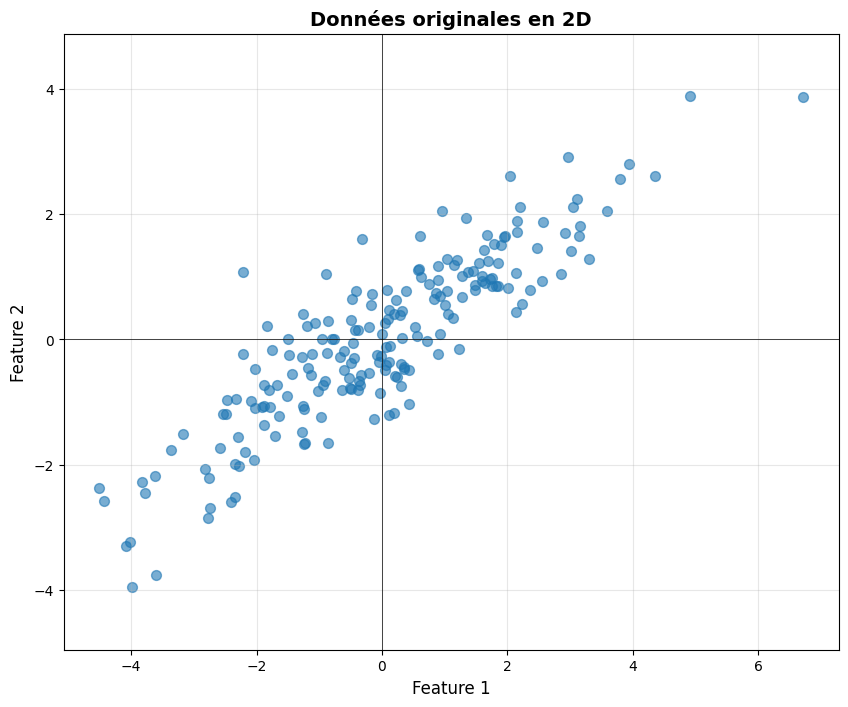

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Générer des données corrélées en 2D
np.random.seed(42)
mean = [0, 0]
cov = [[4, 2.5],
       [2.5, 2]]
# ATTENTION : quand vous inventez une matrice de variance/covariance, vérifiez toujours qu’elle est semi-définie positive !
X_2d = np.random.multivariate_normal(mean, cov, 200)

print(f"Données : {X_2d.shape[0]} points dans ℝ²")
print(f"\nPremiers points :")
print(X_2d[:5])

# Visualiser les données originales
plt.figure(figsize=(10, 8))
plt.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.6, s=50)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.grid(True, alpha=0.3)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Données originales en 2D', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

##### Application de notre algorithme ACP

In [27]:
pca_2d = PCA(k_components=2)
Z_2d = pca_2d.fit_transform(X_2d)

print("\nVariance expliquée par chaque composante :")
for i, var in enumerate(pca_2d.explained_variance()):
    ratio = pca_2d.explained_variance_ratio()[i]
    print(f"  PC{i+1} : {var:.3f} ({ratio*100:.1f}%)")

print(f"\nVariance totale expliquée : {np.sum(pca_2d.explained_variance_ratio())*100:.1f}%")

ACP entraînée avec 2 composantes

Variance expliquée par chaque composante :
  PC1 : 5.196 (94.8%)
  PC2 : 0.285 (5.2%)

Variance totale expliquée : 100.0%


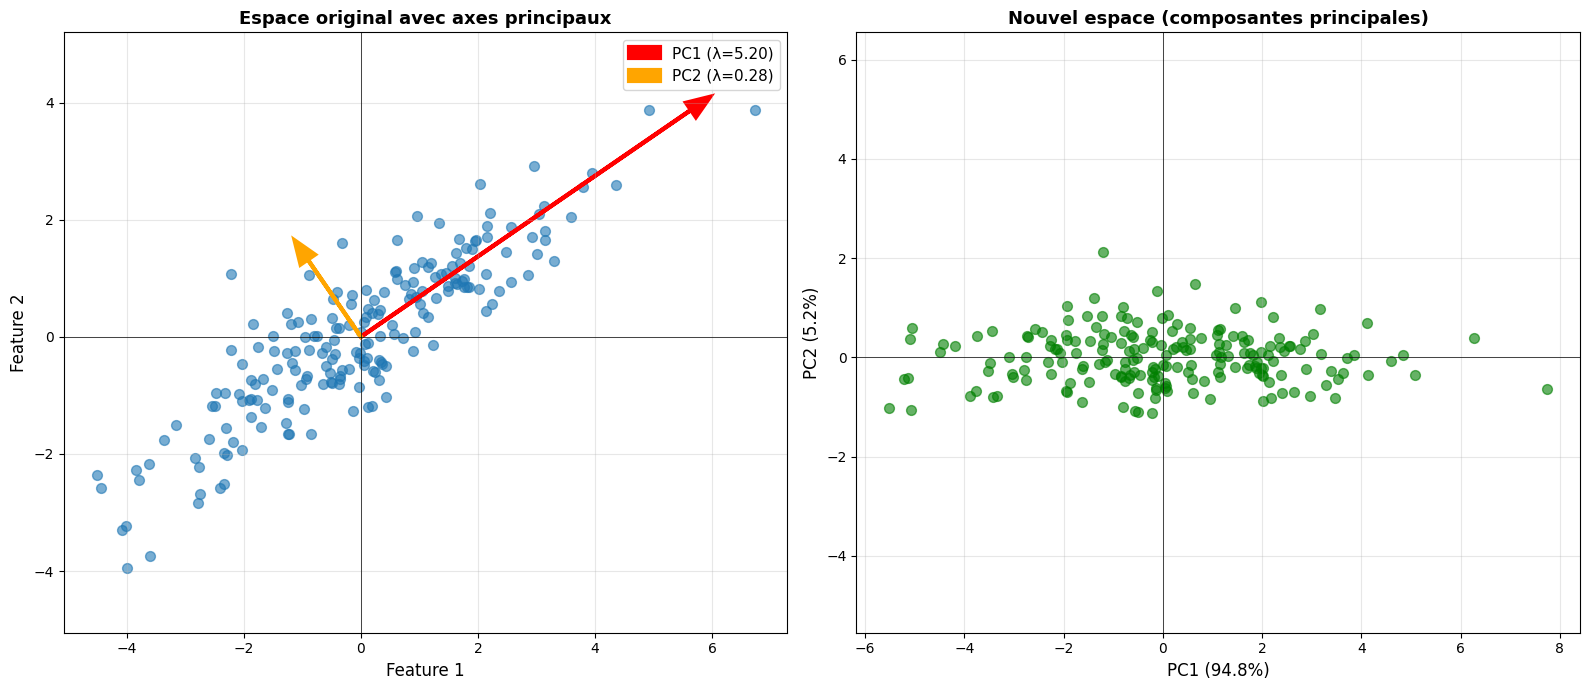

💡 Observation : Les axes sont maintenant alignés avec les directions de variance maximale !


In [28]:
# Visualisation avec les composantes principales

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Gauche : données originales avec axes principaux
ax1.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.6, s=50)

# Tracer les composantes principales
colors = ['red', 'orange']
for i in range(2):
    v = pca_2d.components[:, i] * np.sqrt(pca_2d.eigenvalues[i]) * 3
    ax1.arrow(0, 0, v[0], v[1], 
              head_width=0.3, head_length=0.4, 
              fc=colors[i], ec=colors[i], linewidth=3,
              label=f'PC{i+1} (λ={pca_2d.eigenvalues[i]:.2f})')

ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=11)
ax1.set_xlabel('Feature 1', fontsize=12)
ax1.set_ylabel('Feature 2', fontsize=12)
ax1.set_title('Espace original avec axes principaux', fontsize=13, fontweight='bold')
ax1.axis('equal')

# Droite : données dans le nouvel espace
ax2.scatter(Z_2d[:, 0], Z_2d[:, 1], alpha=0.6, s=50, color='green')
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.axvline(x=0, color='k', linewidth=0.5)
ax2.grid(True, alpha=0.3)
ax2.set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio()[0]*100:.1f}%)', fontsize=12)
ax2.set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio()[1]*100:.1f}%)', fontsize=12)
ax2.set_title('Nouvel espace (composantes principales)', fontsize=13, fontweight='bold')
ax2.axis('equal')

plt.tight_layout()
plt.show()

print("💡 Observation : Les axes sont maintenant alignés avec les directions de variance maximale !")

##### On a quand même fait tout ça pour faire de la réduction de dimension. On y va ?

Maintenant, utilisons l'ACP sur des données de dimensions (vraiment) plus élevées pour réduire la dimensionnalité de manière *vraiment* significative :

In [29]:
# Générer des données en haute dimension
np.random.seed(42)
n_samples = 500
n_features = 50

# Créer des données avec structure (certaines features corrélées)
X_high = np.random.randn(n_samples, n_features)
# Ajouter des corrélations
for i in range(10):
    X_high[:, i*5:(i+1)*5] = X_high[:, i*5:(i+1)*5] @ np.random.randn(5, 5)

print(f"Données : {X_high.shape[0]} échantillons × {X_high.shape[1]} features")
print(f"Dimension originale : ℝ^{n_features}")

Données : 500 échantillons × 50 features
Dimension originale : ℝ^50


n = 50 : là on commence à discuter !

Jetons un œil à l’évolution de la variance expliquée en fonction du nombre de composantes considérées. À votre avis, on pourrait se satisfaire d’un modèle avec combien de composantes pour expliquer la variance de nos données ?

ACP entraînée avec 50 composantes


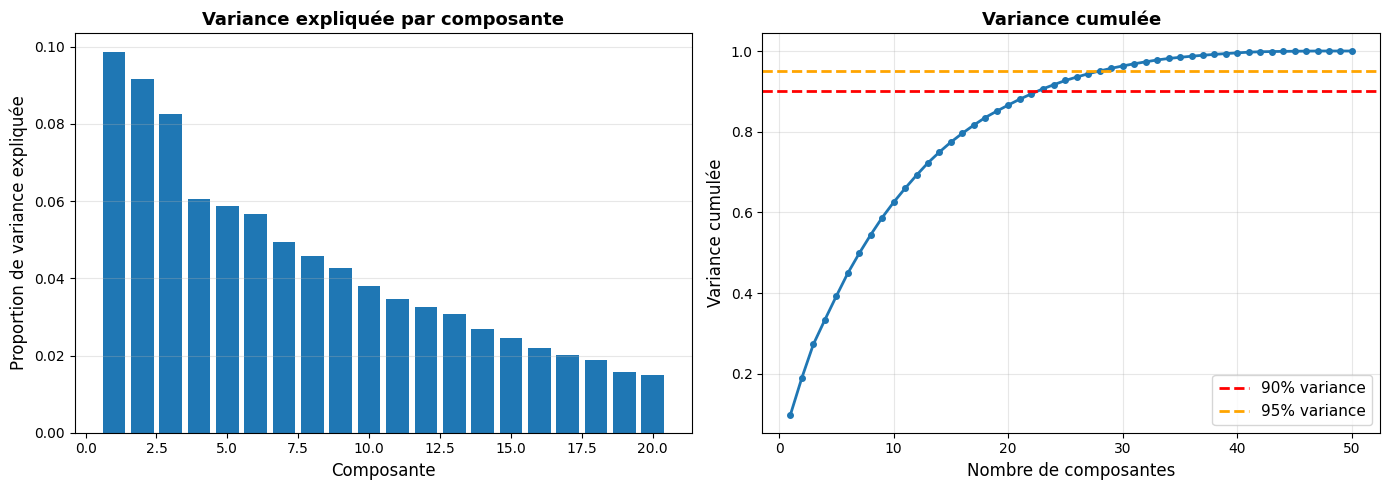


Pour capturer 90% de la variance : 23 composantes
Pour capturer 95% de la variance : 28 composantes


In [30]:
# Appliquer l'ACP avec différents nombres de composantes
pca_full = PCA(k_components=n_features)
pca_full.fit(X_high)

# Variance expliquée
var_ratio = pca_full.explained_variance_ratio()
cumsum_var = np.cumsum(var_ratio)

# Scree plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Variance par composante
ax1.bar(range(1, 21), var_ratio[:20])
ax1.set_xlabel('Composante', fontsize=12)
ax1.set_ylabel('Proportion de variance expliquée', fontsize=12)
ax1.set_title('Variance expliquée par composante', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Variance cumulée
ax2.plot(range(1, n_features+1), cumsum_var, 'o-', linewidth=2, markersize=4)
ax2.axhline(y=0.9, color='r', linestyle='--', linewidth=2, label='90% variance')
ax2.axhline(y=0.95, color='orange', linestyle='--', linewidth=2, label='95% variance')
ax2.set_xlabel('Nombre de composantes', fontsize=12)
ax2.set_ylabel('Variance cumulée', fontsize=12)
ax2.set_title('Variance cumulée', fontsize=13, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Trouver le nombre de composantes pour 90% et 95%
n_90 = np.argmax(cumsum_var >= 0.90) + 1
n_95 = np.argmax(cumsum_var >= 0.95) + 1

print(f"\nPour capturer 90% de la variance : {n_90} composantes")
print(f"Pour capturer 95% de la variance : {n_95} composantes")

#### Exercice 17 : Choix du nombre de composantes

Utilisez l'ACP sur ces données haute dimension et :

* Réduisez à 10 composantes et calculez la variance expliquée
* Réduisez à 30 composantes et calculez la variance expliquée
* Quel nombre de composantes recommanderiez-vous (la bonne réponse peut être une autre valeur que 10 ou 30, on a vue précédemment !) ? Pourquoi ?

In [17]:
# Exercice 17 : Votre code !

# a) 10 composantes
# VOTRE CODE

print(f"a) Avec 10 composantes :")
print(f"   Dimension réduite : {Z_10.shape}")
print(f"   Variance expliquée : {var_10*100:.2f}%")

# b) 30 composantes


print(f"\nb) Avec 30 composantes :")
print(f"   Dimension réduite : {Z_30.shape}")
print(f"   Variance expliquée : {var_30*100:.2f}%")

# c) Recommandation
print(f"\nc) Recommandation :")
# VOTRE CODE

a) Avec 10 composantes :


NameError: name 'Z_10' is not defined

##### Qualité de la « reconstruction »

Si on diminue le nombre de composantes, c’est pour disposer d’un modèle plus simple, mais qui reste proche de la réalité, complexe, à haute dimension. On peut se demander comment le fait de diminuer le nombre de composante impacte la capacité à « reconstruire » (faire la transformation inverse) les données originale à partir du modèle en dimension réduite. Le code suivant teste cela en essayant différentes reconstructions avec différentes valeurs de $k$. Pour mesurer l’erreur, on va utiliser l’indice MSE : Mean Square Error. Si vous n’êtes pas familier avec cette notion, on y reviendra plus tard dans le cours, lorsque l’on abordera le machine learning et la régression.

ACP entraînée avec 5 composantes
ACP entraînée avec 10 composantes
ACP entraînée avec 20 composantes
ACP entraînée avec 30 composantes
ACP entraînée avec 40 composantes
ACP entraînée avec 50 composantes


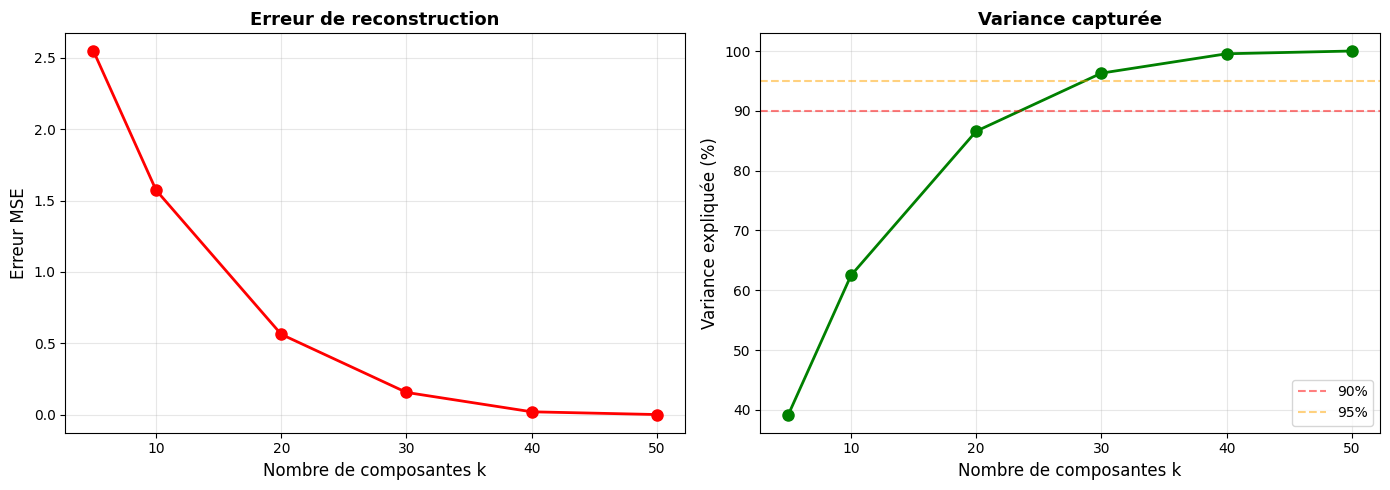

Plus k est élevé, plus l'erreur diminue et plus de variance est capturée


In [32]:
# Reconstruction avec différents k

def reconstruction_error(X, k_components):
    """Calculer l'erreur de reconstruction"""
    pca = PCA(k_components=k_components)
    Z = pca.fit_transform(X)
    X_reconstructed = pca.inverse_transform(Z)
    
    # Erreur MSE
    mse = np.mean((X - X_reconstructed)**2)
    
    return mse, pca.explained_variance_ratio().sum()

# Tester différents nombres de composantes
k_values = [5, 10, 20, 30, 40, 50]
errors = []
variances = []

for k in k_values:
    if k <= X_high.shape[1]:
        mse, var = reconstruction_error(X_high, k)
        errors.append(mse)
        variances.append(var * 100)

# Visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Erreur de reconstruction
ax1.plot(k_values, errors, 'o-', linewidth=2, markersize=8, color='red')
ax1.set_xlabel('Nombre de composantes k', fontsize=12)
ax1.set_ylabel('Erreur MSE', fontsize=12)
ax1.set_title('Erreur de reconstruction', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Variance expliquée
ax2.plot(k_values, variances, 'o-', linewidth=2, markersize=8, color='green')
ax2.axhline(y=90, color='r', linestyle='--', alpha=0.5, label='90%')
ax2.axhline(y=95, color='orange', linestyle='--', alpha=0.5, label='95%')
ax2.set_xlabel('Nombre de composantes k', fontsize=12)
ax2.set_ylabel('Variance expliquée (%)', fontsize=12)
ax2.set_title('Variance capturée', fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Plus k est élevé, plus l'erreur diminue et plus de variance est capturée")

### Jouons avec des données réélles : iris

Utilisons l'ACP sur un dataset réel pour visualiser des données multidimensionnelles.

In [35]:
# Charger le dataset Iris
from sklearn.datasets import load_iris

iris = load_iris()
X_iris = iris.data
y_iris = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print("Dataset Iris :")
print(f"  {X_iris.shape[0]} échantillons")
print(f"  {X_iris.shape[1]} features : {feature_names}")
print(f"  {len(target_names)} classes : {target_names}")
print(f"\nPremières lignes :")
print(X_iris[:5])

Dataset Iris :
  150 échantillons
  4 features : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
  3 classes : ['setosa' 'versicolor' 'virginica']

Premières lignes :
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [37]:
# Appliquer l'ACP pour réduire à 2D
pca_iris = PCA(k_components=2)
X_iris_2d = pca_iris.fit_transform(X_iris)

print("\nVariance expliquée :")
for i, (var, ratio) in enumerate(zip(pca_iris.explained_variance(), 
                                     pca_iris.explained_variance_ratio())):
    print(f"  PC{i+1} : {var:.3f} ({ratio*100:.1f}%)")

print(f"\nTotal : {pca_iris.explained_variance_ratio().sum()*100:.1f}% de la variance")

ACP entraînée avec 2 composantes

Variance expliquée :
  PC1 : 4.200 (92.5%)
  PC2 : 0.241 (5.3%)

Total : 97.8% de la variance


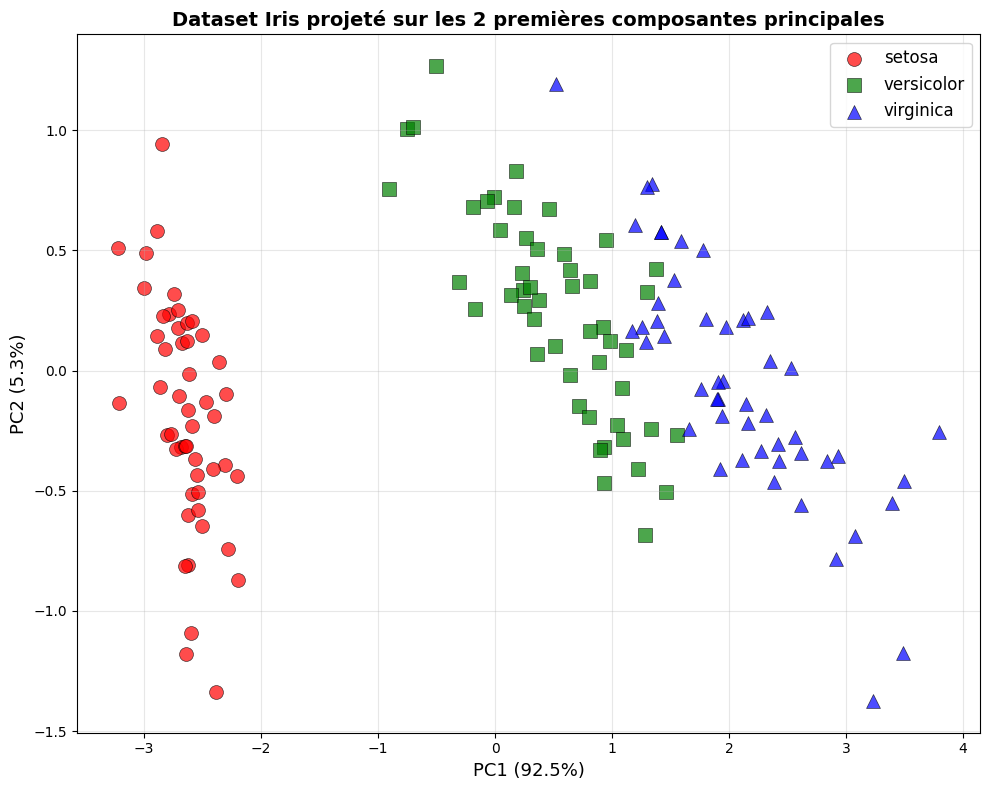


L'ACP permet de visualiser les 4 dimensions originales en 2D !
   Les classes sont bien séparées dans cet espace réduit.


In [38]:
# Visualisation en 2D avec les classes

plt.figure(figsize=(10, 8))

colors = ['red', 'green', 'blue']
markers = ['o', 's', '^']

for i, (color, marker, name) in enumerate(zip(colors, markers, target_names)):
    mask = y_iris == i
    plt.scatter(X_iris_2d[mask, 0], X_iris_2d[mask, 1],
               c=color, marker=marker, s=100, alpha=0.7,
               edgecolors='black', linewidth=0.5,
               label=name)

plt.xlabel(f'PC1 ({pca_iris.explained_variance_ratio()[0]*100:.1f}%)', fontsize=13)
plt.ylabel(f'PC2 ({pca_iris.explained_variance_ratio()[1]*100:.1f}%)', fontsize=13)
plt.title('Dataset Iris projeté sur les 2 premières composantes principales', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nL'ACP permet de visualiser les 4 dimensions originales en 2D !")
print("   Les classes sont bien séparées dans cet espace réduit.")

## Connexions avec K-means (Chapitre 1)

L'ACP et K-means sont **complémentaires** :

1. **ACP avant K-means** : Réduire la dimension pour accélérer K-means
2. **Visualisation** : Projeter les clusters en 2D/3D
3. **Preprocessing** : Éliminer le bruit et les redondances

**Pipeline typique** :
```
Données haute dimension
    ↓
ACP (réduction de dimension)
    ↓
K-means (clustering)
    ↓
Visualisation des clusters en 2D
```

Exercice final :

1. Chargez Iris ou un dataset de votre choix
2. Appliquez l'ACP pour réduire à 2-3 dimensions
3. Appliquez K-means sur les données réduites
4. Visualisez les clusters
5. Comparez avec K-means sur les données originales

**Questions** :
- L'ACP améliore-t-elle les résultats de K-means ?
- Combien de variance faut-il garder ?
- Les clusters sont-ils plus nets en dimension réduite ?

In [39]:
# Exercice final : votre code !!


## Limites de la PCA

La PCA ne fonctionne qu’avec des données où une projection linéaire peut résoudre le problème. Un exemple classique qui ne fonctionne pas est le fameux « swiss roll » :

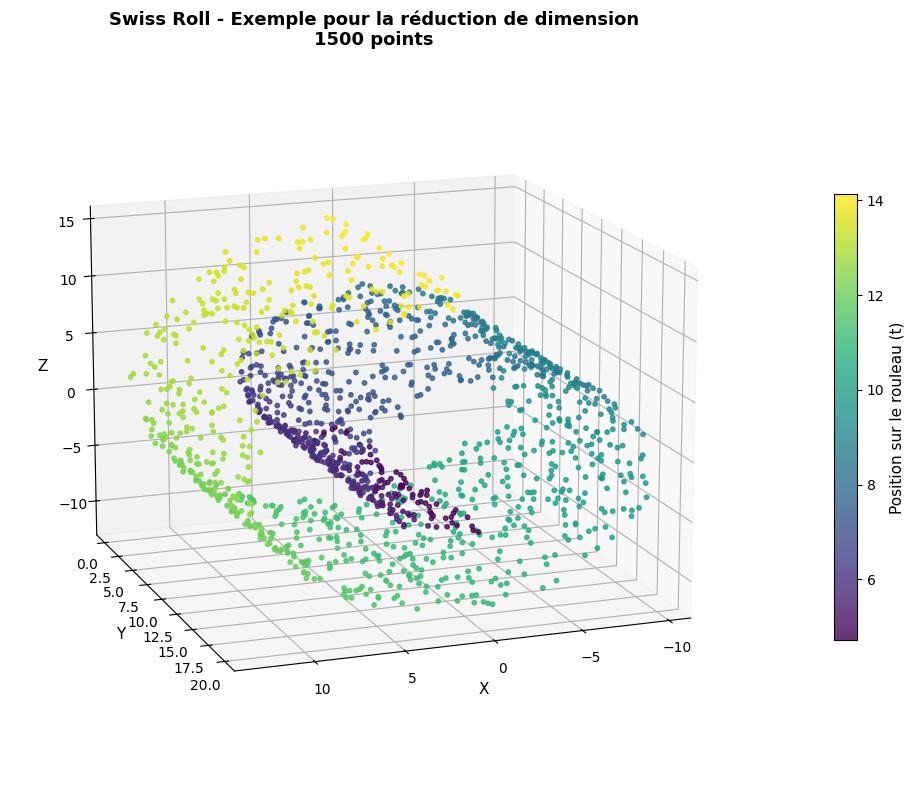

SWISS ROLL - GÉNÉRATION ET VISUALISATION

Nombre de points : 1500
Bruit ajouté : 0.1

------------------------------------------------------------
FORMULES DE GÉNÉRATION
------------------------------------------------------------
t ∈ [1.5π, 4.5π]  (paramètre angulaire)
x = t × cos(t)
y = aléatoire ∈ [0, 20]  (hauteur)
z = t × sin(t)


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Paramètres du Swiss Roll
n_points = 1500
noise = 0.1

# Génération du Swiss Roll
# t : paramètre qui contrôle la position sur le rouleau (angle)
t = 1.5 * np.pi * (1 + 2 * np.random.rand(n_points))

# Coordonnées 3D du Swiss Roll
x = t * np.cos(t)
y = 20 * np.random.rand(n_points)  # hauteur aléatoire
z = t * np.sin(t)

# Ajout de bruit
x += noise * np.random.randn(n_points)
z += noise * np.random.randn(n_points)

# Création de la figure 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Tracé des points avec dégradé de couleur basé sur t (position sur le rouleau)
scatter = ax.scatter(x, y, z, c=t, cmap='viridis', s=10, alpha=0.8)

# Ajout de la barre de couleur
cbar = fig.colorbar(scatter, ax=ax, shrink=0.6, pad=0.1)
cbar.set_label('Position sur le rouleau (t)', fontsize=11)

# Configuration des axes
ax.set_xlabel('X', fontsize=11)
ax.set_ylabel('Y', fontsize=11)
ax.set_zlabel('Z', fontsize=11)
ax.set_title('Swiss Roll - Exemple pour la réduction de dimension\n' +
             f'{n_points} points', fontsize=13, fontweight='bold')

# Ajustement de l'angle de vue
ax.view_init(elev=15, azim=70)

plt.tight_layout()
plt.show()

# Affichage des informations dans la console
print("=" * 60)
print("SWISS ROLL - GÉNÉRATION ET VISUALISATION")
print("=" * 60)

print(f"\nNombre de points : {n_points}")
print(f"Bruit ajouté : {noise}")

print("\n" + "-" * 60)
print("FORMULES DE GÉNÉRATION")
print("-" * 60)
print("t ∈ [1.5π, 4.5π]  (paramètre angulaire)")
print("x = t × cos(t)")
print("y = aléatoire ∈ [0, 20]  (hauteur)")
print("z = t × sin(t)")

Le Swiss Roll est un exemple classique de **variété** non-linéaire :
* en 3D, on distingue bien les données organisées sour la forme d’un rouleau
* mais on perçoit bien que la structure intrinsèque est 2D (t, y) qui est « enroulée » dans l’espace
* cet enroulement est mis en évidence par le dégradé de couleur qui montre la vraie « distance » entre les points sur le rouleau

Pour résoudre ce type de problème, on va soit utiliser des techniques qui font des hyptothèse a priori sur la variété non-linéaire, soit être capable de gérer directement la non-linéarité, car la PCA sera en échec. On le voit facilement en réalisant une projection naïve des points sur (x, y), où la relation de « distance » entre les points est totalement ignorée par le modèle. Des points de même couleurs – proches sur le rouleau – se retrouvent éloignés sur la projection sur le plan, et des points éloignés sur le rouleau se retrouvent rapprochés sur la projection, qui a « superposé » les différents « plis » du rouleau (qui aurait plutôt dû être « déroulé ») :

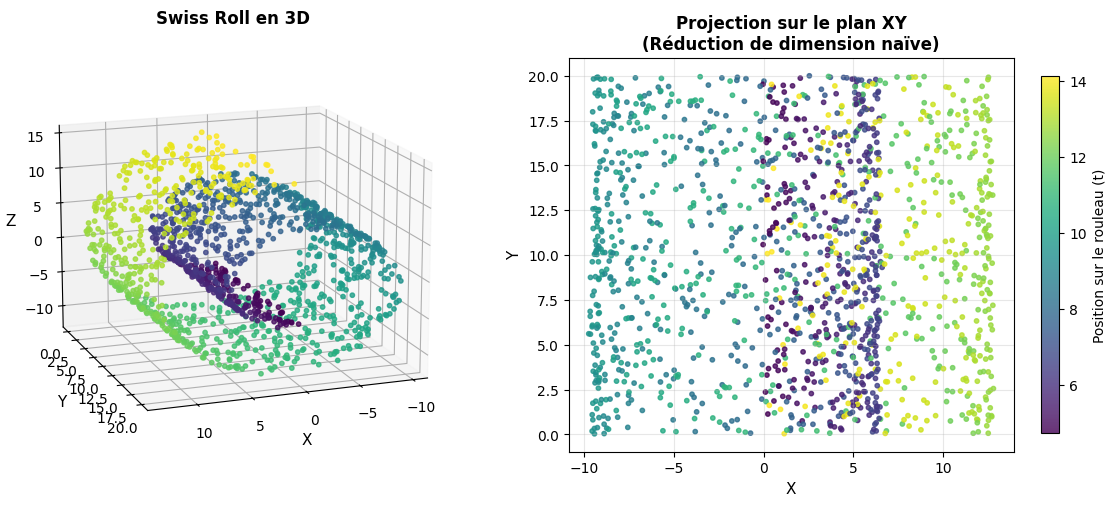

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Paramètres du Swiss Roll
n_points = 1500
noise = 0.1

# Génération du Swiss Roll
t = 1.5 * np.pi * (1 + 2 * np.random.rand(n_points))

# Coordonnées 3D du Swiss Roll
x = t * np.cos(t)
y = 20 * np.random.rand(n_points)
z = t * np.sin(t)

# Ajout de bruit
x += noise * np.random.randn(n_points)
z += noise * np.random.randn(n_points)

# Création de la figure avec deux sous-graphiques
fig = plt.figure(figsize=(12, 5))

# Sous-graphique 1 : Swiss Roll en 3D
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(x, y, z, c=t, cmap='viridis', s=10, alpha=0.8)
ax1.set_xlabel('X', fontsize=11)
ax1.set_ylabel('Y', fontsize=11)
ax1.set_zlabel('Z', fontsize=11)
ax1.set_title('Swiss Roll en 3D', fontsize=12, fontweight='bold')
ax1.view_init(elev=15, azim=70)

# Sous-graphique 2 : Projection sur le plan XY
ax2 = fig.add_subplot(122)
scatter2 = ax2.scatter(x, y, c=t, cmap='viridis', s=10, alpha=0.8)
ax2.set_xlabel('X', fontsize=11)
ax2.set_ylabel('Y', fontsize=11)
ax2.set_title('Projection sur le plan XY\n(Réduction de dimension naïve)', 
              fontsize=12, fontweight='bold')
ax2.set_aspect('equal', adjustable='box')
ax2.grid(True, alpha=0.3)

# Barre de couleur commune
cbar = fig.colorbar(scatter2, ax=ax2, shrink=0.8)
cbar.set_label('Position sur le rouleau (t)', fontsize=10)

plt.tight_layout()
plt.show()


Le problème ne vient pas de ce que la PCA pourrait géré ce qu’une projection naïve ne sait pas faire (elle sont de même nature, projection linéaire, qui n’arrive pas à capturer la structure non-linéaire des données). Essayez donc par vous-même une PCA sur ces données.

Pour résoudre ce problème vous pouvez faire des recherches sur :
* ACP à noyau (kernel-PCA)
* t-SNE
* Isomap (qui gère des distances géodésiques)
* UMAP

Pour aller plus loin, comparez votre implémentation de la PCA avec celle de scikit-learn (indice : `from sklearn.decomposition import PCA`)

Pour les problèmes non-linéaires, recherchez la dans la documentation de scikit-learn le mot clé « manifold » (repli). Autres indices pour vous aider dans vos explorations :
* `from sklearn.datasets import make_swiss_roll`
* `from sklearn.manifold import Isomap, TSNE`


**En tout cas, bravo, vous êtes venu à bout d’un gros morceau, tant en matière de mathématiques que de modèle en data science !**